# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)


from sklearn.model_selection import train_test_split


import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


from sklearn.model_selection import GridSearchCV



from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

### Load Dataset

In [2]:
df = pd.read_csv('INNHotelsGroup.csv')

#copying the data to another data_1
data = df.copy()

In [3]:
##First 5 rows of the dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [4]:
##Last 5 rows of the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [5]:
data.shape

(36275, 19)

#### There are 36275 rows with 19 columns in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`,`type_of_meal_plan`,`room_type_reserved`,`market_segment_type` and `booking_status` are the columns with object type while the rest of the columns are numeric.

### Check for the mssing values and dropping the duplicate Values 

In [7]:
#Checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
#Checking for duplicate values
data.duplicated().sum()

0

In [9]:
#Check for unique values
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

#### As shown above the `Booking_ID` has 36275 unique values which is the number of rows in dataset. So let's drop the booking_ID column

In [10]:
data.drop(["Booking_ID"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:

Q1. What are the busiest months in the hotel?

A1. The Busiest month is october as shown in the graph

Q2. Which market segment do most of the guests come from?

A2. Most of the guests come from Online market segment

Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

A3.Mostly the prices are same across all the market segments with online market segment being slightly higher

Q4. What percentage of bookings are canceled?

A4. Almost 33% of the bookings are canceled

Q5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

A5. Only around 2% of the repeated guests cancel

Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

A6. There are total of 5 max special requirements when booking a room. People with more than 3 special requests never cancel

### Statistical Summary of the data

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


* The number of adults are ranging from 0 to 4 with a mean of approaximately 2 adults per booking
* The number of children are ranging from 0 to 10 per booking
* On an average the reservations are done during the weekdays with atleast 2 nights per reservation with 17 days max whereas on weekend the average nights are booked 1 nights per reservations

### Univariate Analysis

In [12]:
#defining a histogram function
def hist_box(data, feature, figsize=(15, 10), kde=True, bins=None):
    
    f2, (ax_hist2,ax_box2) = plt.subplots(
        nrows=2,  
        sharex=True,
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--" #Mean line-Green
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-" #Median line-Black
    )  

In [13]:
#Function to create labeled barplot
def label_barplot(data, feature, perc=True, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()

#### Leadtime Observations
As shown below most of the reservations are with 0 leading time meaning the reservations are done at the last moment or directly at the hotel

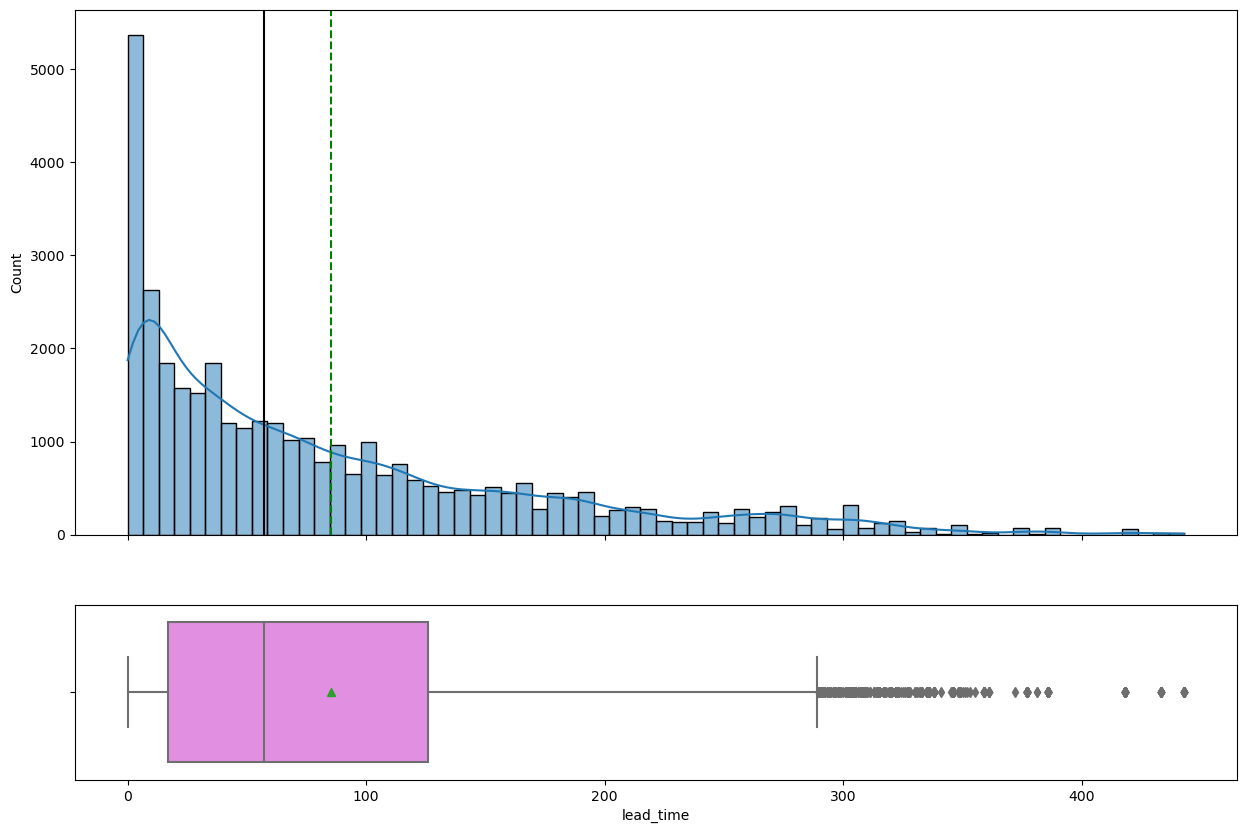

In [14]:
hist_box(data,"lead_time")

#### Average Price per Room graphs
As shown below the average price for the room is 100 € hut there are a lot of outliers in the dataset for Average price of the room.

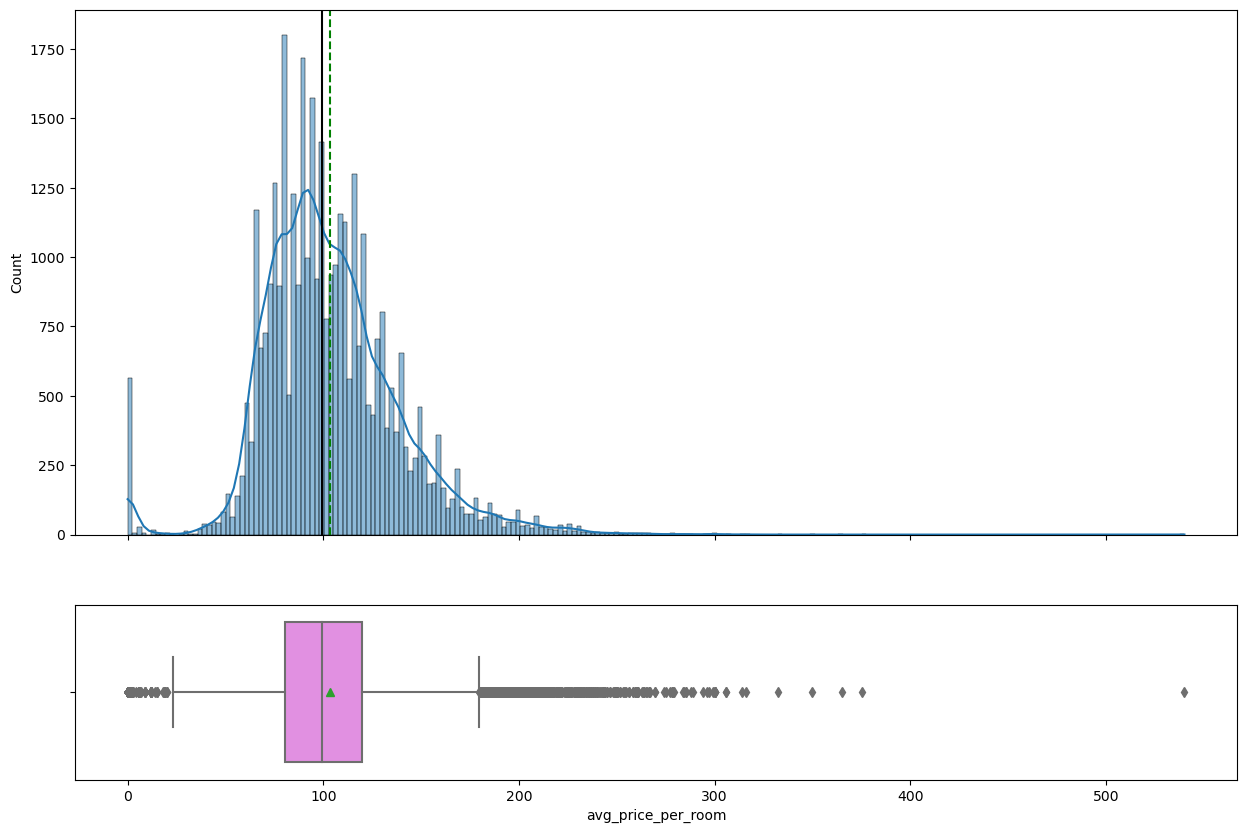

In [15]:
hist_box(data,"avg_price_per_room")

In [16]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [18]:
Q1 = data["avg_price_per_room"].quantile(0.25)   #25th quantile
Q1

80.3

In [19]:
Q3 = data["avg_price_per_room"].quantile(0.75)   #75th quantile 
Q3

120.0

In [20]:
IQR = Q3 - Q1      #IQR
IQR

39.7

In [21]:
U_Whisker = Q3 + 1.5 * IQR # Upper Outlier
U_Whisker

179.55

In [22]:
#Assigning the value of upper whisker to the outlier
data.loc[data["avg_price_per_room"] >=300, "avg_price_per_room"] = U_Whisker

In [23]:
data.loc[data["avg_price_per_room"] == U_Whisker]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
4150,2,2,1,2,Meal Plan 1,0,Room_Type 7,4,2018,7,8,Online,0,0,0,179.55000,3,Not_Canceled
5163,2,2,1,1,Meal Plan 1,0,Room_Type 7,18,2018,10,22,Online,0,0,0,179.55000,4,Not_Canceled
9461,3,0,0,2,Meal Plan 1,0,Room_Type 4,21,2018,12,30,Online,0,0,0,179.55000,0,Not_Canceled
13911,2,0,2,3,Meal Plan 2,0,Room_Type 1,170,2018,7,29,Offline,0,0,0,179.55000,0,Canceled
13944,2,2,0,1,Meal Plan 2,1,Room_Type 6,6,2018,8,13,Online,0,0,0,179.55000,0,Canceled
14773,2,2,0,3,Meal Plan 1,0,Room_Type 6,28,2018,6,2,Online,0,0,0,179.55000,1,Not_Canceled
20900,2,1,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,179.55000,1,Canceled
25670,2,2,1,2,Meal Plan 2,0,Room_Type 6,11,2018,9,16,Online,0,0,0,179.55000,0,Canceled
29779,2,0,1,2,Meal Plan 2,0,Room_Type 1,173,2018,7,25,Offline,0,0,0,179.55000,0,Canceled
30475,2,0,2,3,Meal Plan 2,0,Room_Type 1,151,2018,7,3,Offline,0,0,0,179.55000,0,Canceled


#### Observation on the number of the previous booking not cancellations

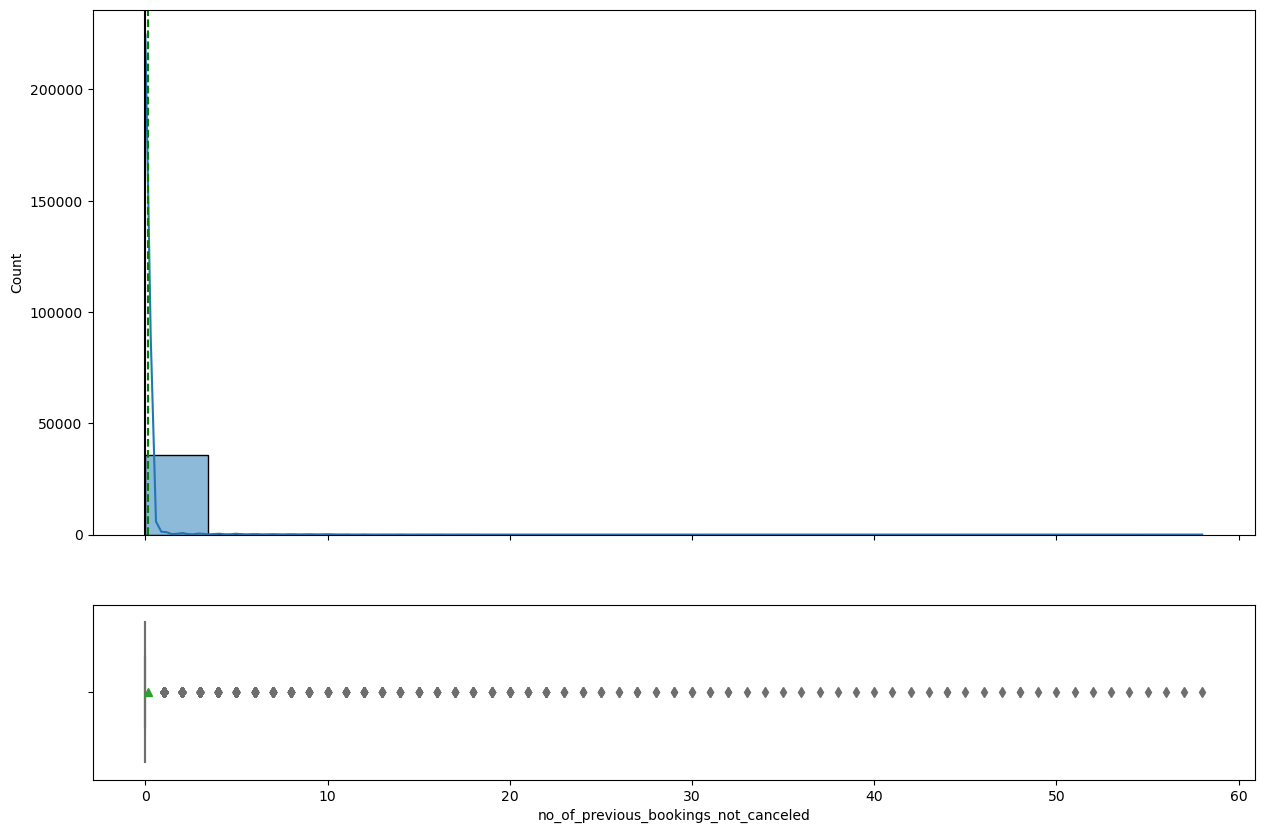

In [24]:
hist_box(data,"no_of_previous_bookings_not_canceled")

#### Observation on the number of the previous booking cancellations

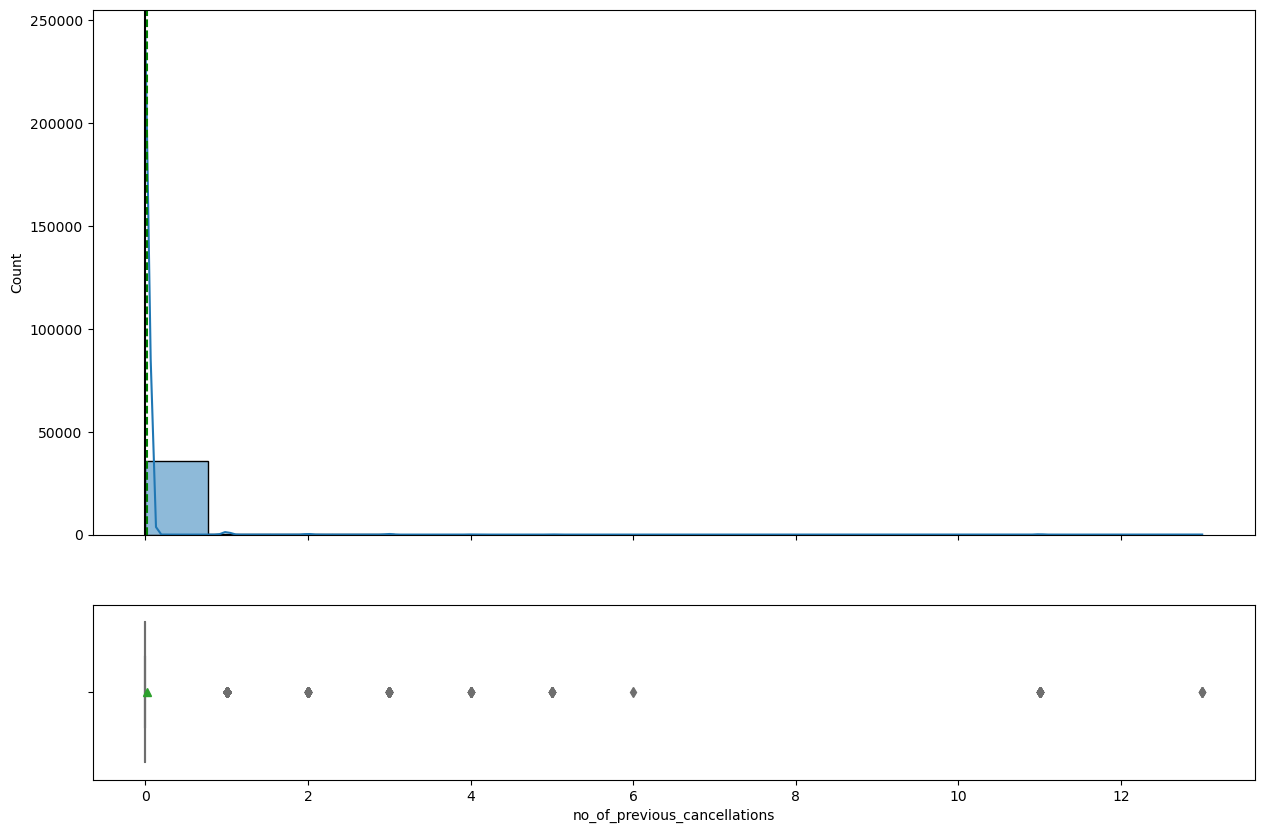

In [25]:
hist_box(data,"no_of_previous_cancellations")

#### Observations on Number of Adults


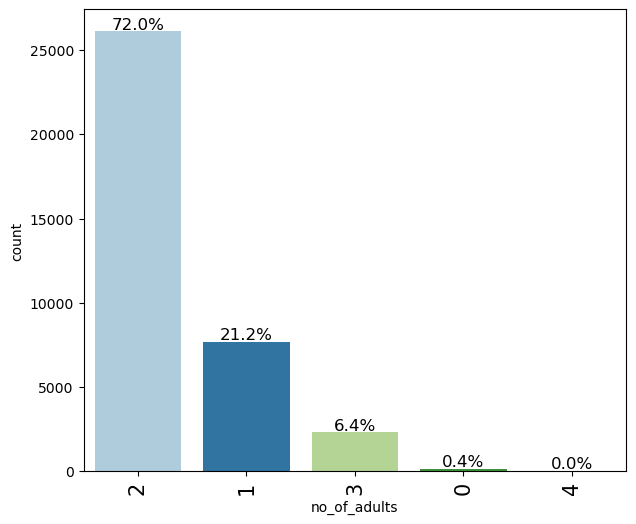

In [26]:
label_barplot(data, "no_of_adults", perc = True)

#### Observations on Number of Adults

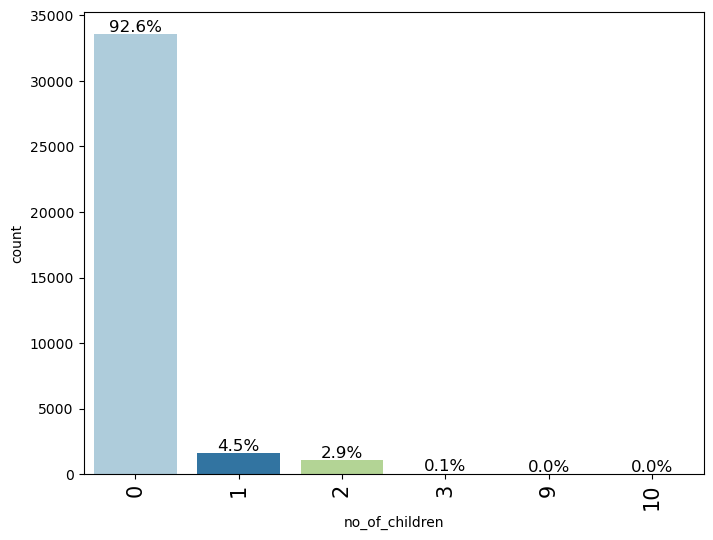

In [27]:
label_barplot(data, "no_of_children", perc = True)

#### Observations on Number of Week Nights

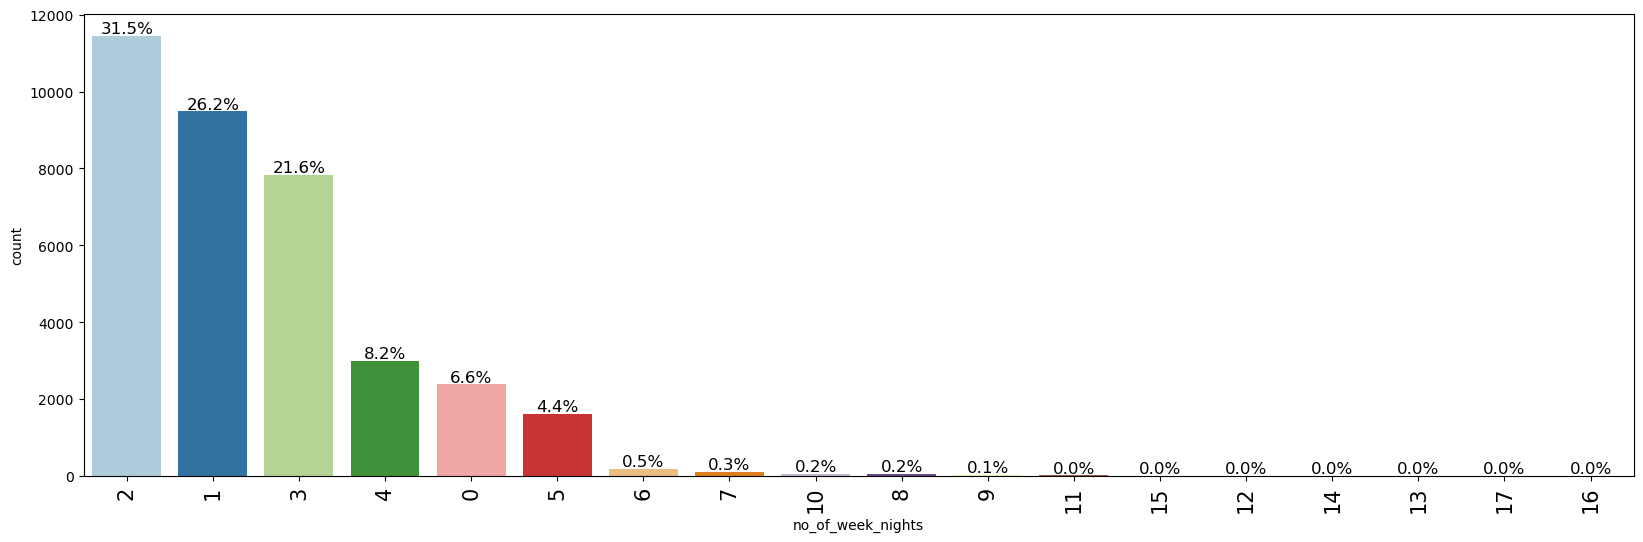

In [28]:
label_barplot(data, "no_of_week_nights")

#### Observations on Number of Weekend Nights

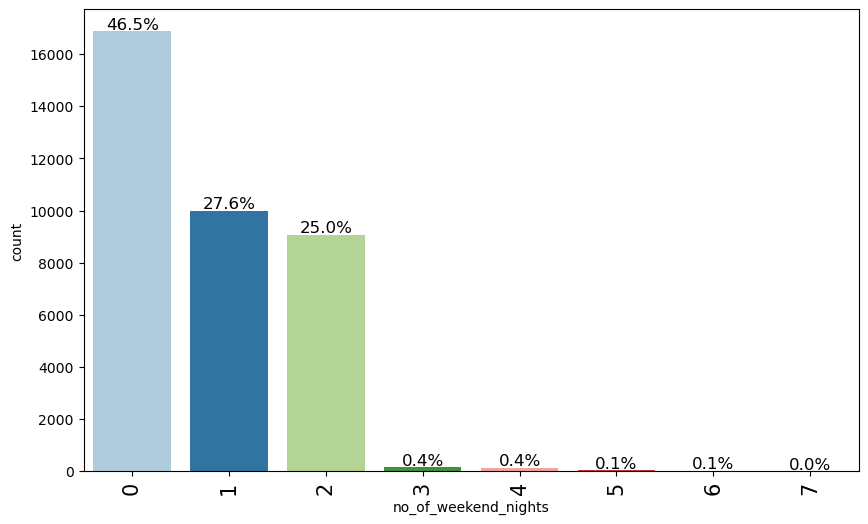

In [29]:
label_barplot(data, "no_of_weekend_nights")

#### Observations on Required Parking Space

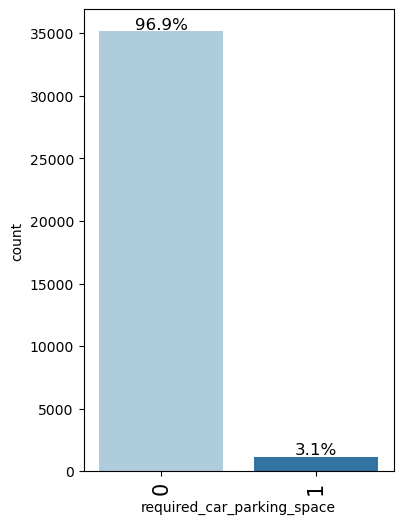

In [30]:
label_barplot(data, "required_car_parking_space")

#### Observations on Type of Meal Plan

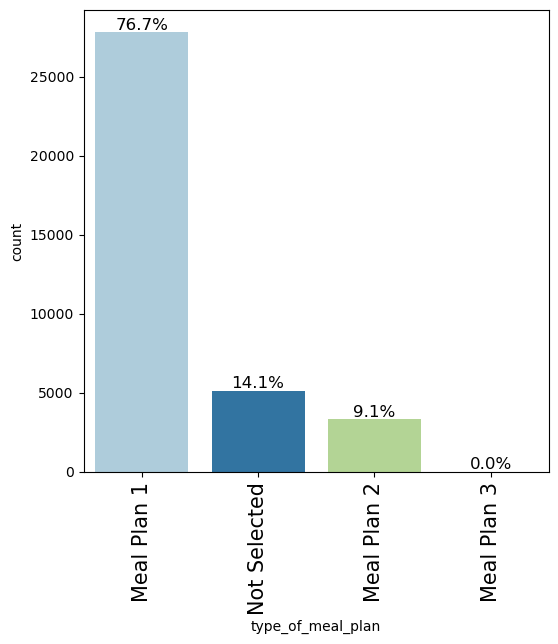

In [31]:
label_barplot(data, "type_of_meal_plan")

#### Observations on Room Type Reserved

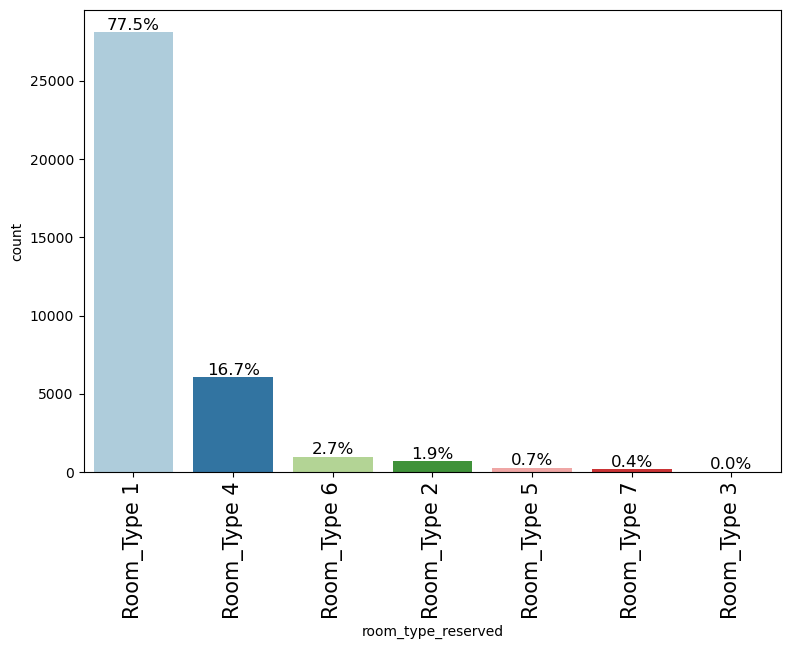

In [32]:
label_barplot(data,"room_type_reserved")

#### Observations on Market Segment Type

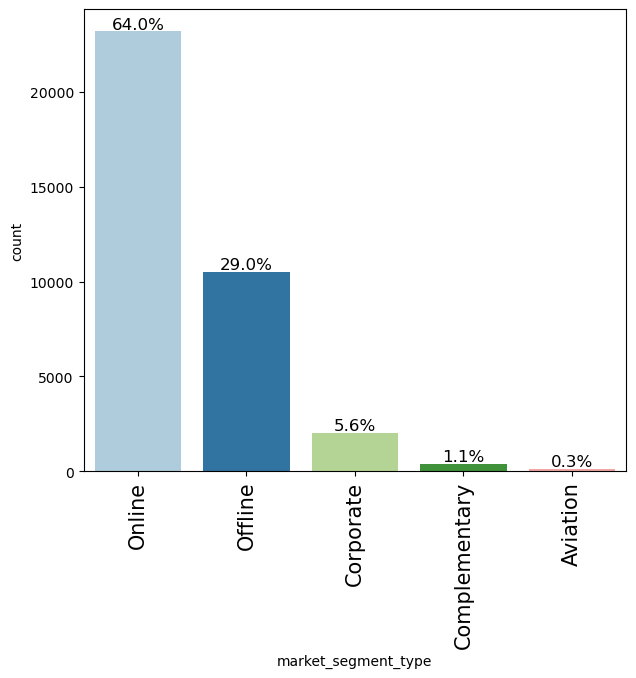

In [33]:
label_barplot(data,"market_segment_type")

#### Observations on Number of Special Requests

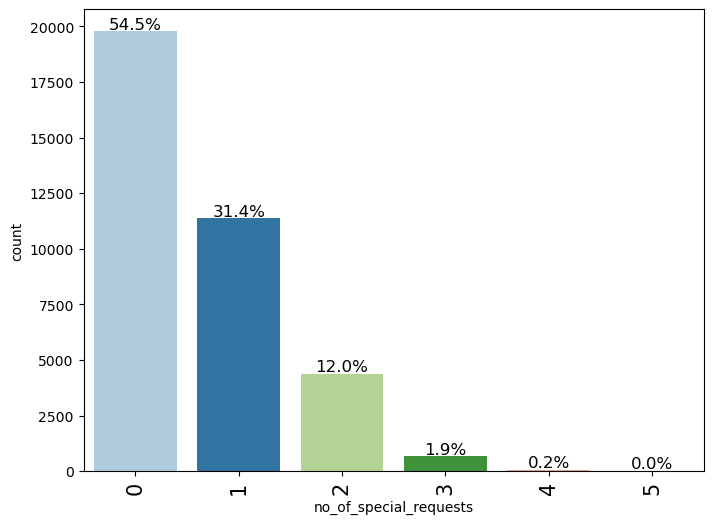

In [34]:
label_barplot(data, "no_of_special_requests")

#### Observations on Booking Status

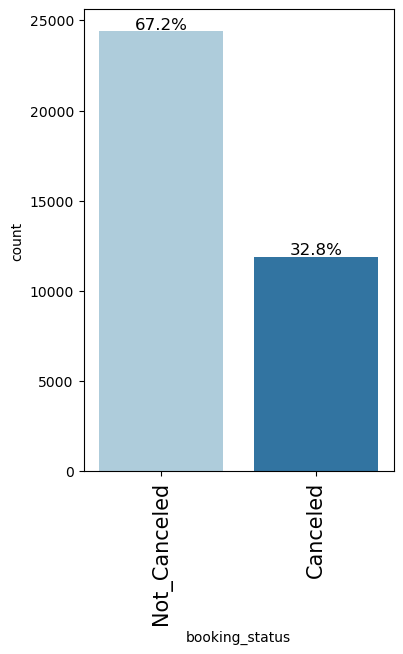

In [35]:
label_barplot(data, "booking_status")

In [36]:
#let's Change the booking status data type to interger by one hot encoding
data["booking_status"] = data["booking_status"].apply(lambda x:1 if x == "Canceled" else 0)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


#### Observations on Arrival Month

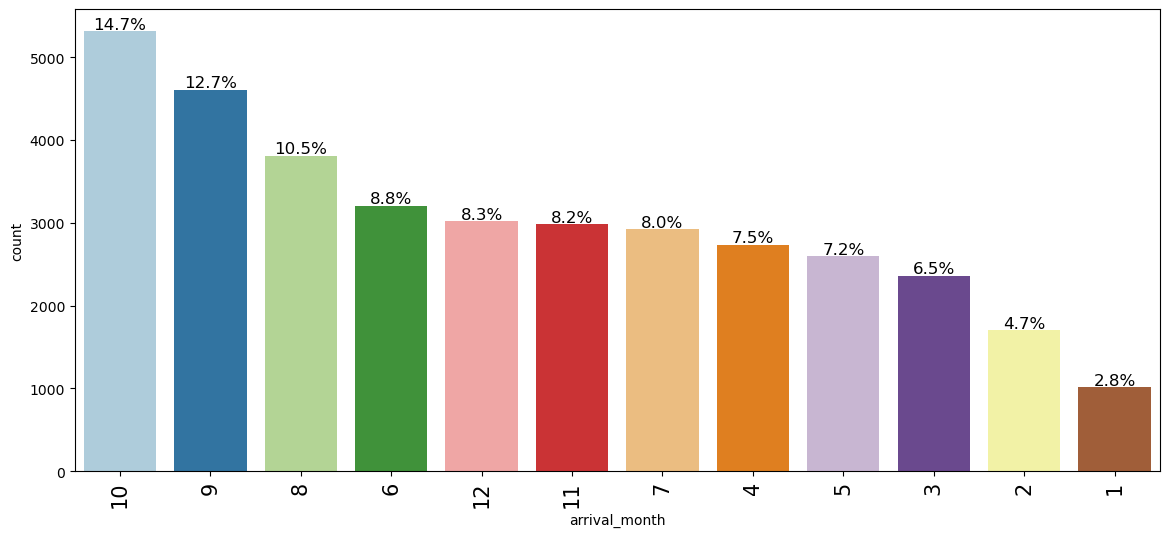

In [37]:
label_barplot(data, "arrival_month")

### Bivariate Analysis

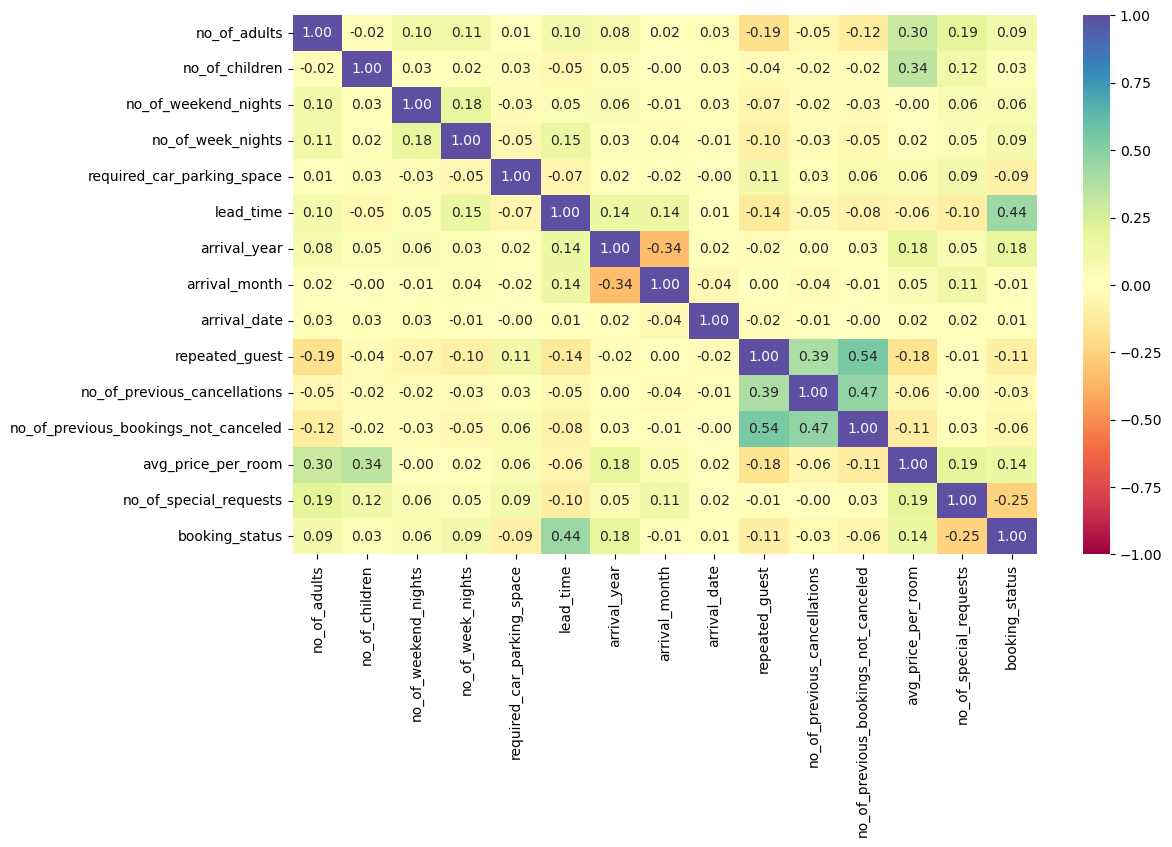

In [38]:
#Let's create the Heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
* A positive correlation exists between repeated guests and the number of previous bookings not cancelled.
* There is a slightly positive correlation between the lead time and booking status.
* There's also a slightly negative correlation between the arrival year and arrival month.

In [39]:
#Function to Create the Plot distribution wrt target

def dist_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [40]:
def stack_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### The price of a hotel room vary according to the demographics and demand, Let's see the barplot of Avg Price WRT market segment

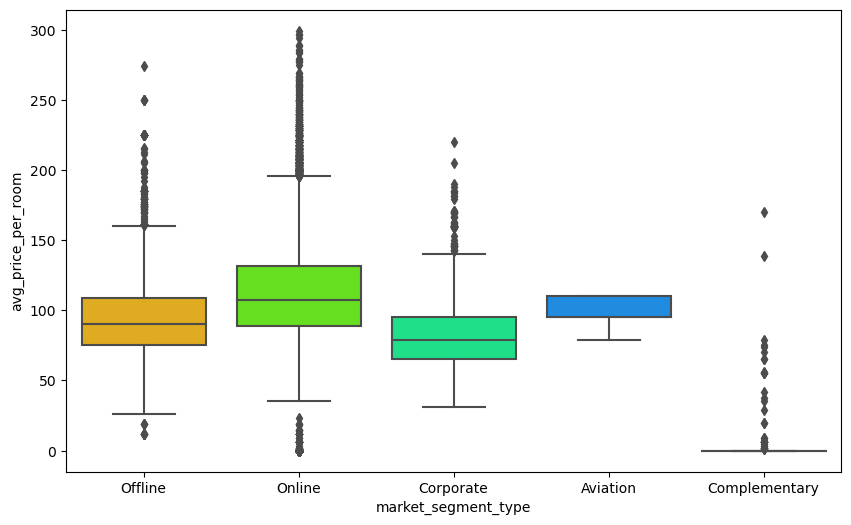

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow")
plt.show()

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


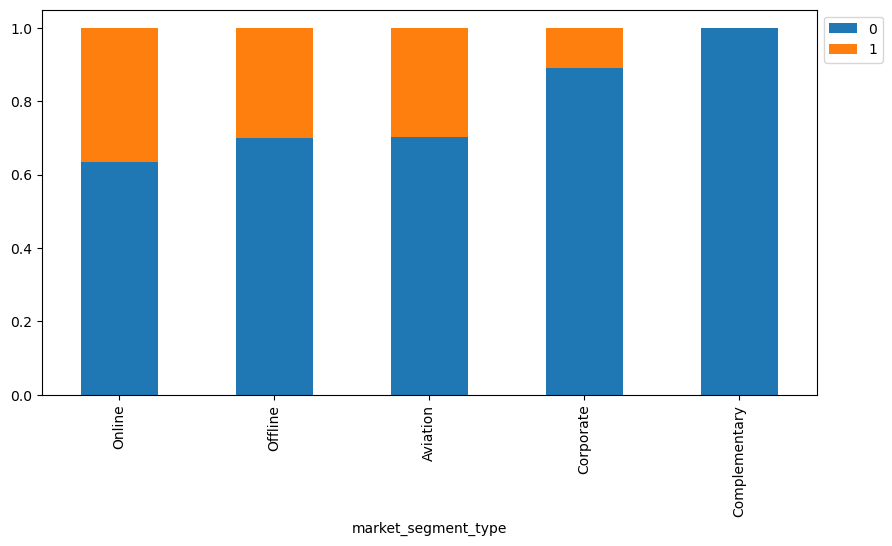

In [42]:
stack_barplot(data,"market_segment_type","booking_status")

#### Observations 
* Around 38% of the online guests cancelled
* Almost 30% of the offline guests cancelled
* Only 20% the aviation guests cancelled
* Almost 10% corporate guests cancelled

#### Let's look at the barplot of Special requirements WRT to cancellations

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


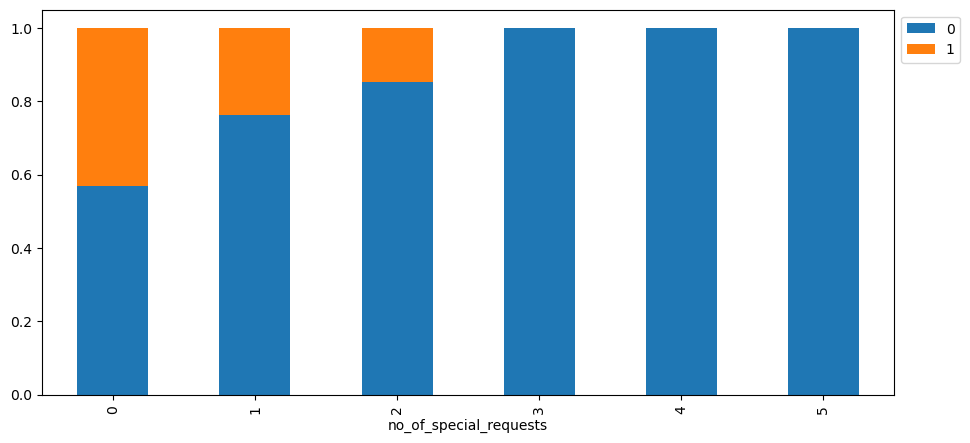

In [43]:
stack_barplot(data,"no_of_special_requests", "booking_status")

* As predicted 100% of the guests with 5 special requests did not cancel
* Almost 40% of the guests cancelled with zero special requests
* Around 20% of the guests cancelled with 1 special requests

#### Let's look at the relationship between special requests and avg price

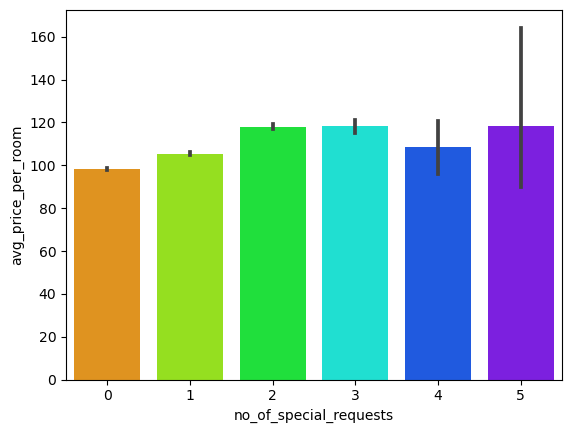

In [44]:
sns.barplot(data=data,x="no_of_special_requests",y="avg_price_per_room",palette="gist_rainbow")
plt.show()

#### Looking at the positive correlations between booking status and Average price per room 

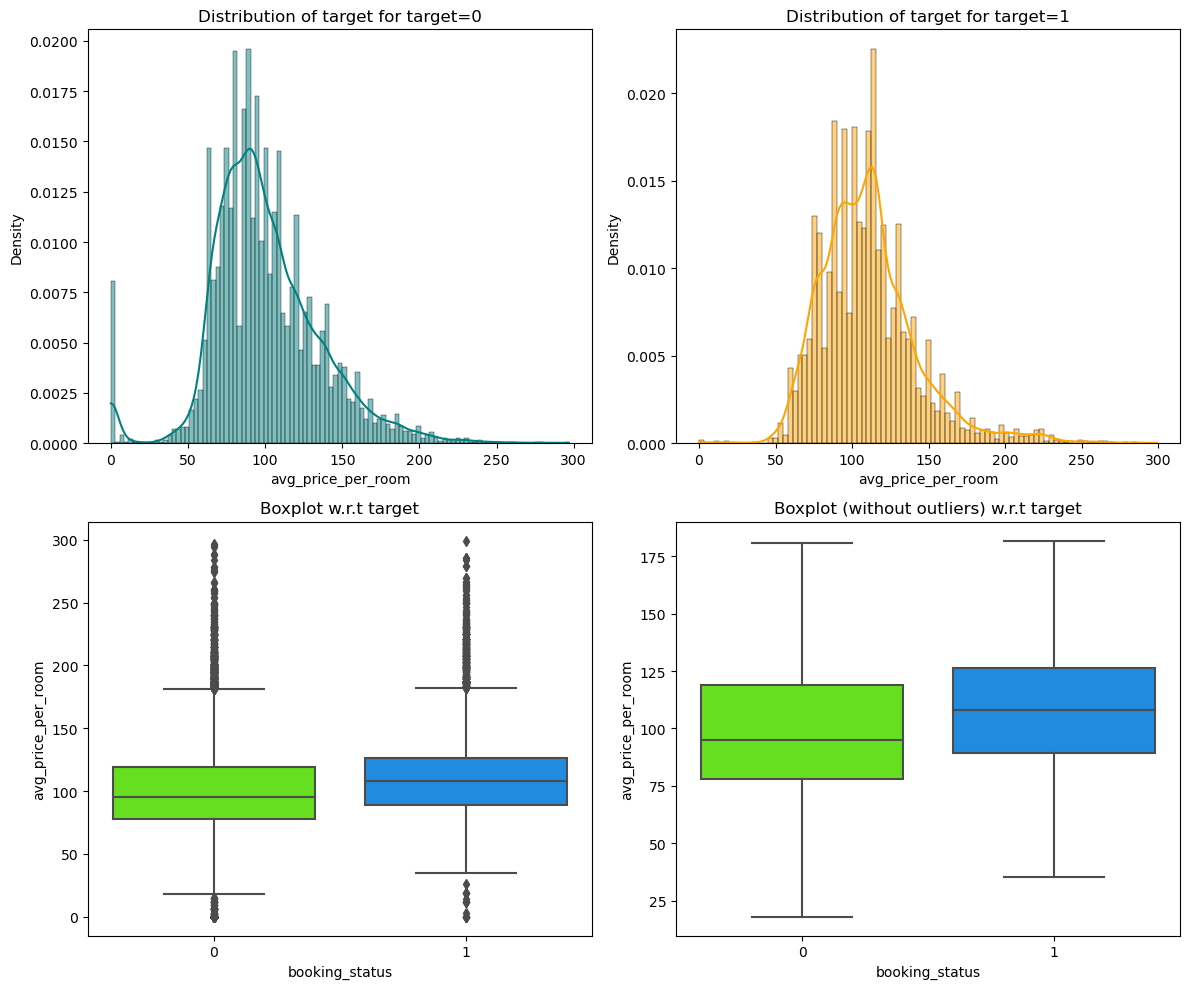

In [45]:
dist_plot_wrt_target(data, "avg_price_per_room", "booking_status")

#### Graph of the booking status and lead time

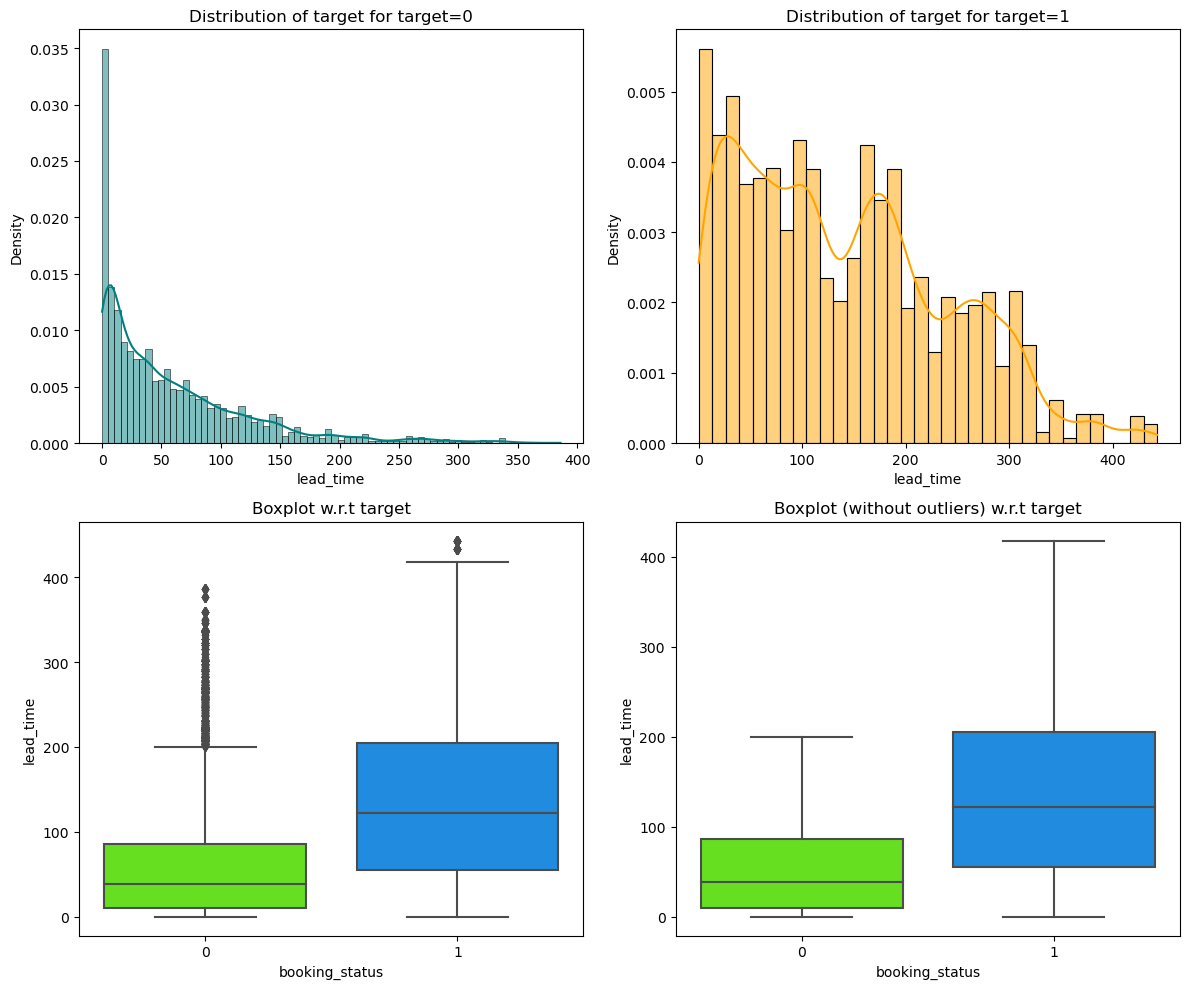

In [46]:
dist_plot_wrt_target(data, "lead_time", "booking_status")

#### Creating a new dataset of the customers who travelled with the families, because people usually travel in group

In [47]:
family = data[(data["no_of_children"] >=0) & (data["no_of_adults"] > 1)]
family

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,1


In [48]:
family["no_of_family_members"] = (family["no_of_adults"] + family["no_of_children"])
family

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,0,3
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,1,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,0,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,1,2


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


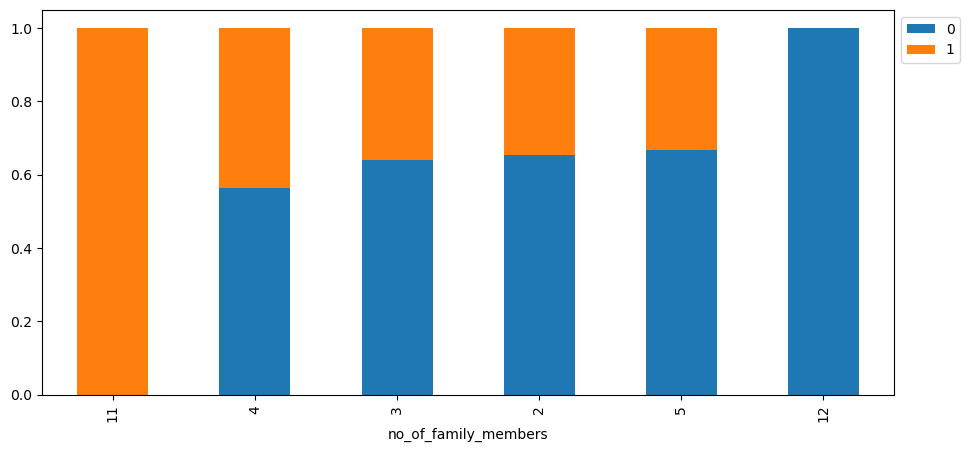

In [49]:
stack_barplot(family,"no_of_family_members","booking_status")

#### Let's look at the booking status of the customers who has reseved it for atleast a day 

In [50]:
stay = data [(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"]>0)]
stay["total_days"] = (stay["no_of_week_nights"]+stay["no_of_weekend_nights"])
stay

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_days
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1,3
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1,2
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55000,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36266,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96000,1,1,4
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,0,8
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,1,4
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,0,8


booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

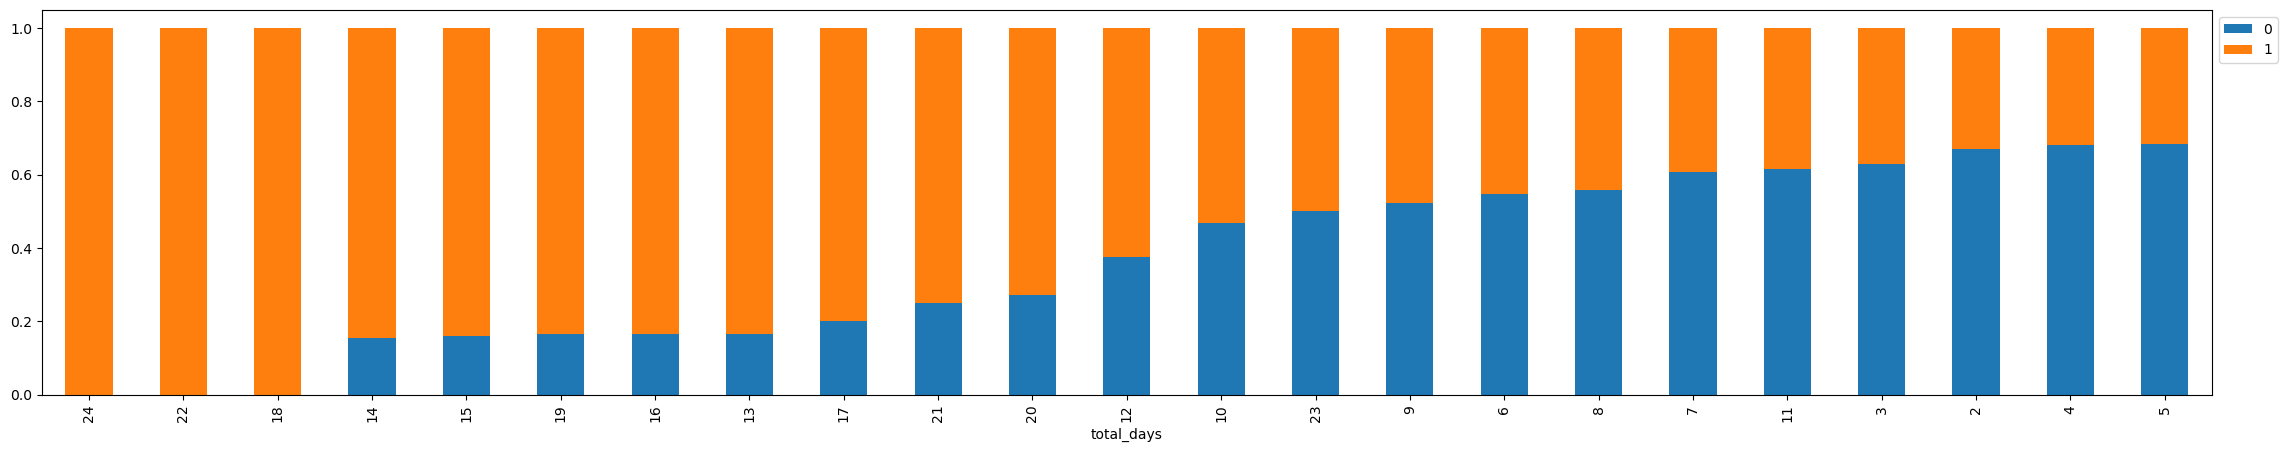

In [51]:
#Lets plot the total days with the booking status
stack_barplot(stay,"total_days","booking_status")

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


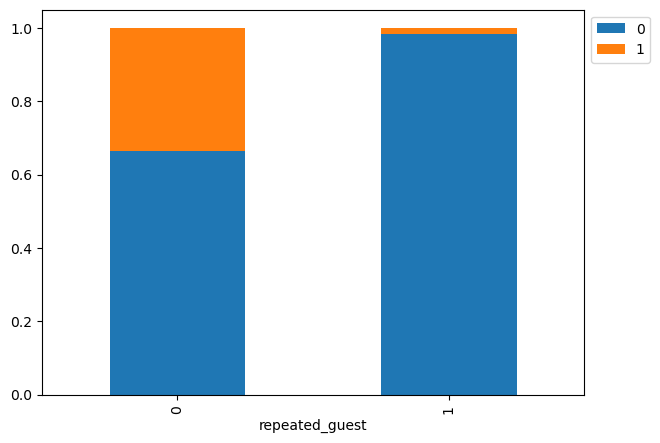

In [52]:
#Let's plot the graph of repeated guest with the booking status
stack_barplot(data,"repeated_guest", "booking_status")

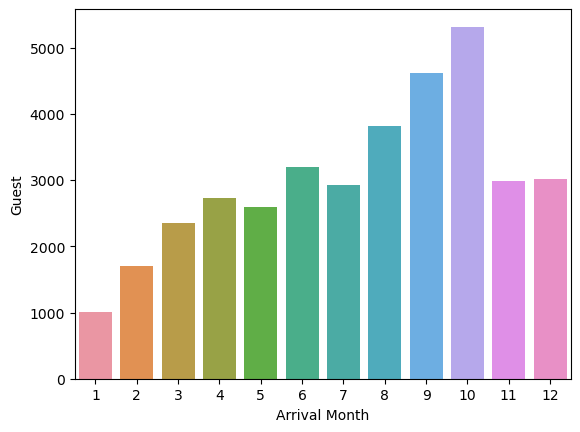

In [53]:
#Plotting the graph to see the busiest month at the motel 
month = data.groupby(["arrival_month"])["booking_status"].count()

month = pd.DataFrame({"Arrival Month" : list(month.index), "Guest":list(month.values)})

sns.barplot(data=month,x="Arrival Month",y="Guest")
plt.show()

#### Looking at the booking cancelled in each month

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


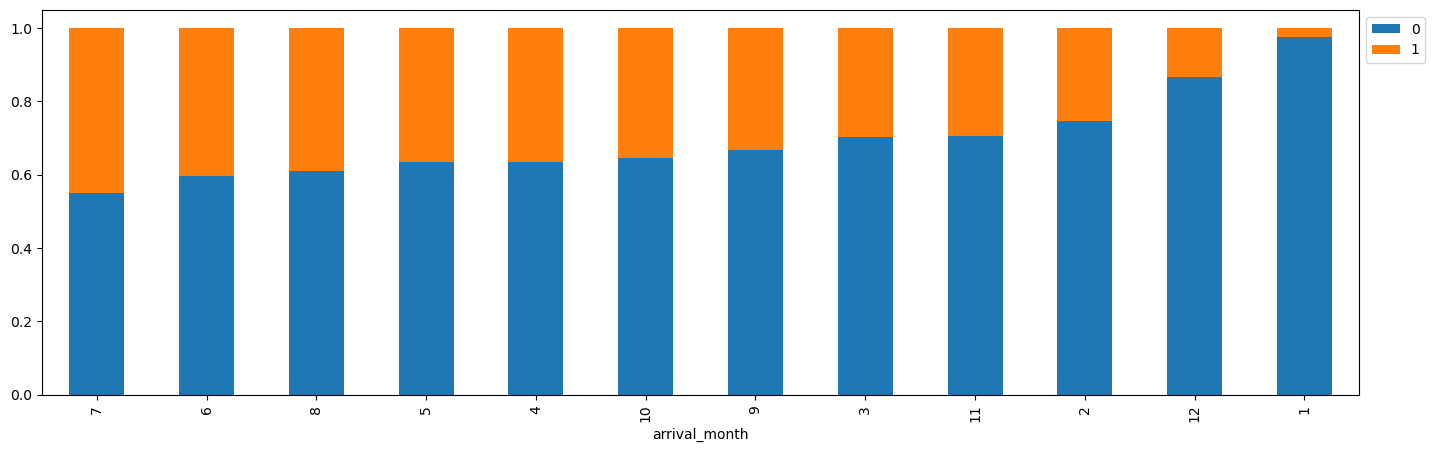

In [54]:
stack_barplot(data,"arrival_month","booking_status")

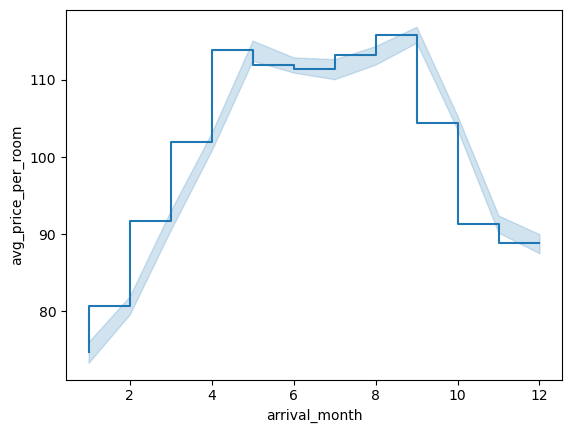

In [55]:
#Average Prices per arrival month
sns.lineplot(data=data, x="arrival_month",y="avg_price_per_room", drawstyle='steps-pre')
plt.show()

## Data Preprocessing


#### As we looked above there is no null values but there are outliers in the data

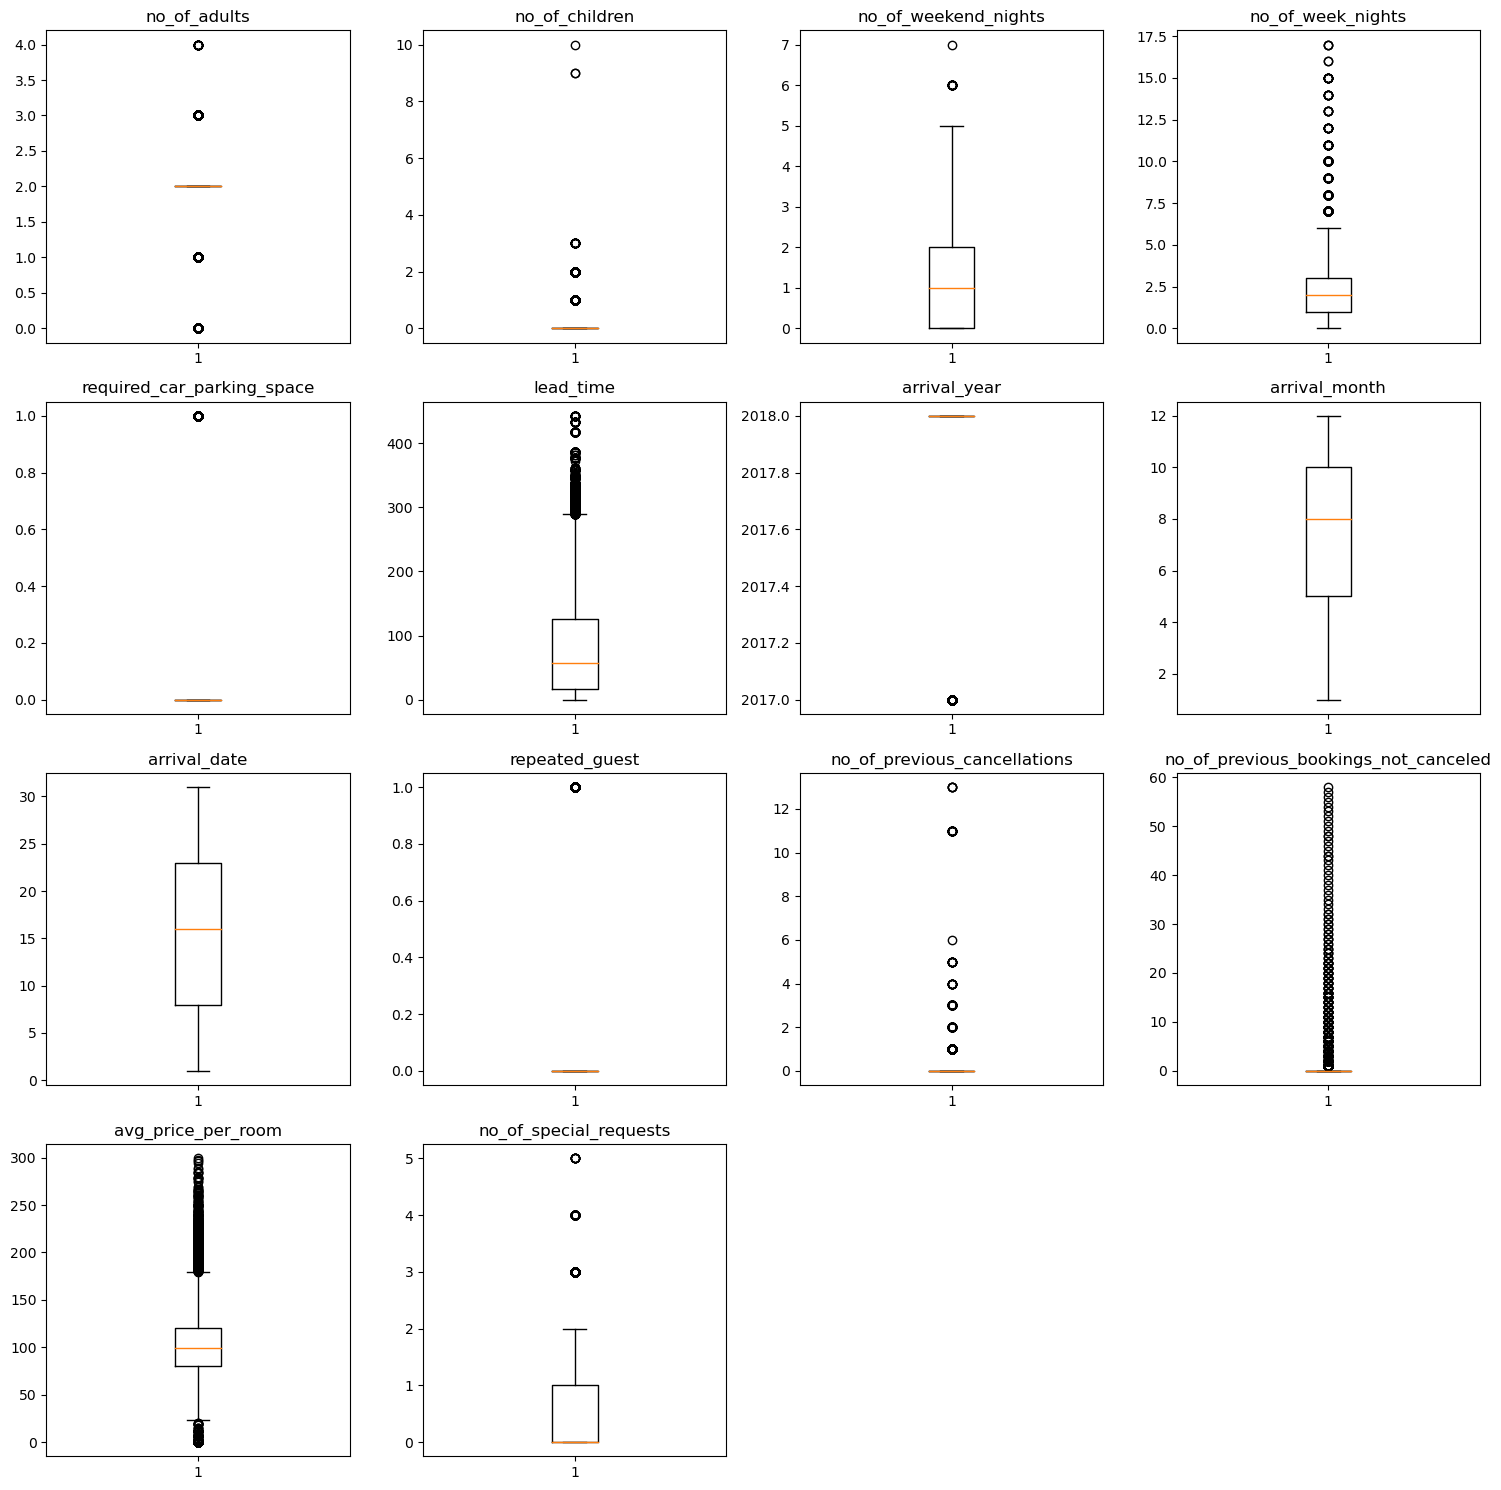

In [56]:
#lets plot the bar plot of the numeric data types
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col.remove("booking_status")

plt.figure(figsize = (15,15))
for i, variable in enumerate(num_col):
    plt.subplot(4 ,4, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Number of adults and avg price per room have lower and upper outliers
* All the other columns have upper outliers 

In [57]:
#looking at the average price per room and why it is zero for some values
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

#### Out of total booking of 545 with price of zero euros 354 were complementary and 191 was online which means the prices are legit

In [58]:
##As caculated above and we already substituted the outlier value with upper whisker
U_Whisker

179.55

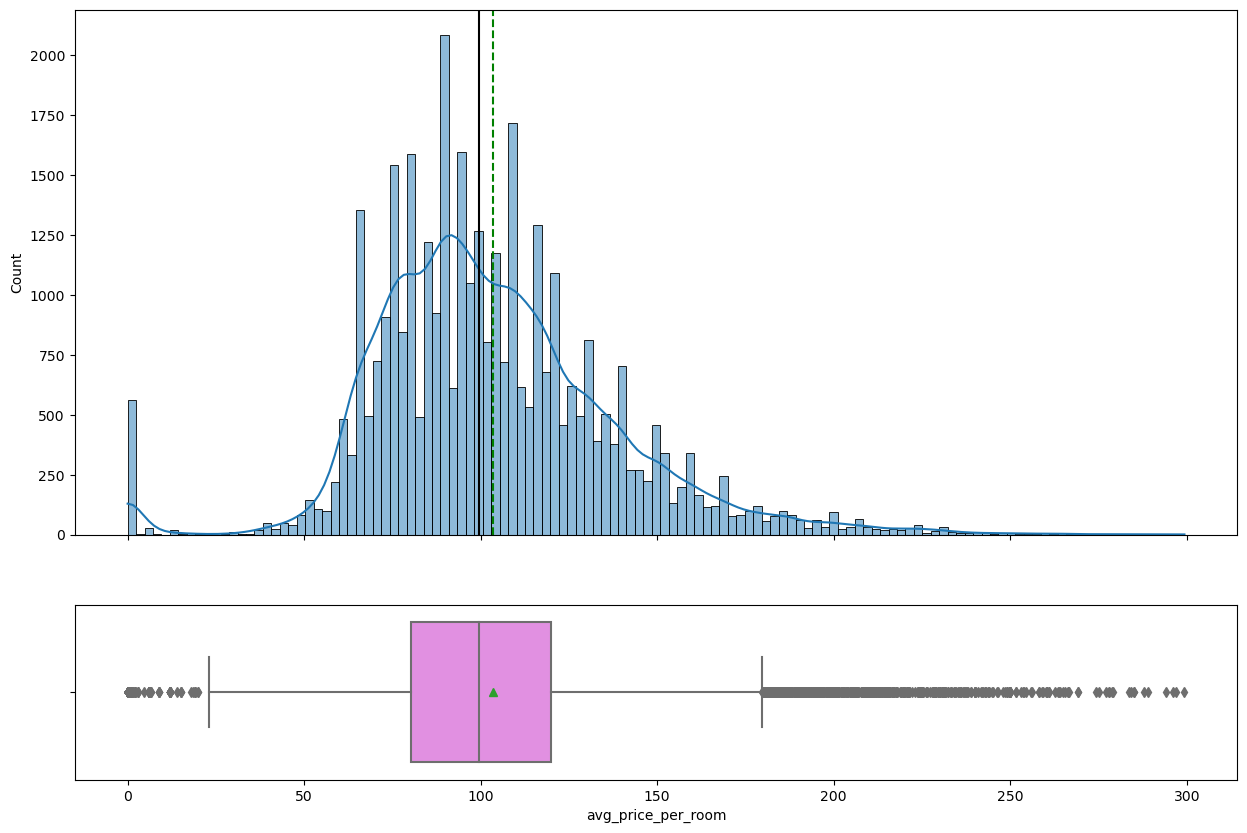

In [59]:
hist_box(data,"avg_price_per_room")

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


In [61]:
#lets look at the value counts for the numeric values
col_list = data.select_dtypes(include=["int64"]).columns.tolist()
for i in col_list:
    print(f"value count for {i}")
    print(data[i].value_counts())
    print(f"To verify total counts {data[i].count()}")
    print("*" * 50)

value count for no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
To verify total counts 36275
**************************************************
value count for no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
To verify total counts 36275
**************************************************
value count for no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
To verify total counts 36275
**************************************************
value count for no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
To verify total counts 36275
**********************

In [62]:
data["no_of_adults"].unique()

array([2, 1, 3, 0, 4], dtype=int64)

In [63]:
data["no_of_children"].unique()

array([ 0,  2,  1,  3, 10,  9], dtype=int64)

In [64]:
data["no_of_weekend_nights"].unique()

array([1, 2, 0, 4, 3, 6, 5, 7], dtype=int64)

In [65]:
data["no_of_week_nights"].unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

In [66]:
data["required_car_parking_space"].unique()

array([0, 1], dtype=int64)

In [67]:
data["lead_time"].unique()

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

In [68]:
data["repeated_guest"].unique()

array([0, 1], dtype=int64)

In [69]:
data["arrival_month"].unique()

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1], dtype=int64)

In [70]:
data["arrival_year"].unique()

array([2017, 2018], dtype=int64)

In [71]:
data["no_of_previous_cancellations"].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

In [72]:
data["no_of_previous_bookings_not_canceled"].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

In [73]:
data["avg_price_per_room"].unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [74]:
data["no_of_special_requests"].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [75]:
data["booking_status"].unique()

array([0, 1], dtype=int64)

#### Based on the unique values of the columns the outliers seem reasonable as no unusual valued found

## Model Building
### Logistic Regression Model
#### Data Preparation 


* Predicting which bookings will be canceled.
* encoding categorical features.
* Splitting the data into train and test 

In [76]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = sm.add_constant(X)

X = pd.get_dummies (X, drop_first=True)

#Splitting the data in Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state=1)

In [77]:
X

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.00000,3,0,2,6,0,85,2018,8,3,0,0,0,167.80000,1,0,0,0,0,0,1,0,0,0,0,0,0,1
36271,1.00000,2,0,1,3,0,228,2018,10,17,0,0,0,90.95000,2,0,0,0,0,0,0,0,0,0,0,0,0,1
36272,1.00000,2,0,2,6,0,148,2018,7,1,0,0,0,98.39000,2,0,0,0,0,0,0,0,0,0,0,0,0,1
36273,1.00000,2,0,0,3,0,63,2018,4,21,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [78]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* As shown above the data is split into 70% and 30% as Train and Test data respectively

In [79]:
logit = sm.Logit(y_train,X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.3297
Time:                        19:33:36   Log-Likelihood:                -10786.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -919.5146    120.841     -7.609      0.000   -1156.358    -682.671
no_of_adults                             0.1118      

* Coefficinets in the model indicate the change in dependent variable 
* `arrival_date`,`type_of_meal_plan_Meal Plan 3`,`no_of_previous_bookings_not_canceled`,`market_segment_type_Complementary` and `market_segment_type_Online` have p value > 0.05
* Unit increase in no_of_repeated_guest while other variables constant decreases the probability of cancellation by 2.34


## Model evaluation criteria
#### Model can make wrong predictions in two ways:

1. Predicting a guest booking will not cancel, but in reality, booking cancels (False Positive)
2. Predicting a guest will cancel, but in reality, booking does not cancel (False Negative)

#### Determine Importance:
Both cases are important:

* If we predict that a booking will not cancel and booking gets canceled, hotel loses revenue and has to bear additional costs of distribution channels, lowering room price

* If we predict that a booking will cancel and booking isn't canceled, hotel might be unable to provide satisfactory services to guests by not being adequately staffed or prepared to host. This might damage brand equity/guest satisfaction and lead to opportunity loss

#### How to reduce the losses?
* Since both scenarios are to be addressed equally, hotel would want F1 Score to be maximized
* Greater the F1 score, higher the chances of minimizing both False Negatives and False Positives
* F1_score = (2 * P * R)/(P + R)

#### Let's create functions to calculate the performance metrics and confsion matrix

* model_performance_classification_statsmodels function ( To check performance of models)
* confusion_matrix_statsmodels function (To plot confusion matrix)

In [80]:
# Defining a function to calculate the performance of the classification models
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # computing Accuracy
    recall = recall_score(target, pred)  # computing Recall
    precision = precision_score(target, pred)  # computing Precision
    f1 = f1_score(target, pred)  #computing F1-score

    # creating a dataframe of metrics
    data_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0])

    return data_perf

In [81]:
#Function to plot the confusion matrix of the classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

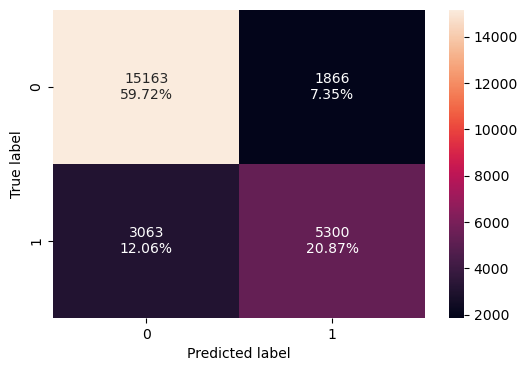

In [82]:
confusion_matrix_statsmodels(lg,X_train,y_train)

In [83]:
print("Performance of the classification model")
model_performance_classification_statsmodels(lg, X_train, y_train)

Performance of the classification model


,Accuracy,Recall,Precision,F1
0,0.80588,0.63374,0.73960,0.68259


* As shown in the performance of the classification model F1 score is 0.68 we need to maximize it
* The model needs to be checked for variable multicollinearity and needs to be removed to obtain reliable p values

### Multicollinearity Check
* To check for Multicollinearity we need to use VIF
* IF VIF is around 1, there is little or No Correlation between independent variables
* IF VIF > 5 There is moderate collinearity
* IF VIF => 10 there is high_multi Collinearity 
* Let's create a function to calculate the VIF

In [84]:
#Function to calculate VIF
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [85]:
check_vif(X_train)

,feature,VIF
0,const,39484236.78442
1,no_of_adults,1.34886
2,no_of_children,1.97845
3,no_of_weekend_nights,1.06960
4,no_of_week_nights,1.09580
5,required_car_parking_space,1.03994
6,lead_time,1.39497
7,arrival_year,1.43142
8,arrival_month,1.27615
9,arrival_date,1.00673


* Only some dummy variables show multicollinearity which can be ignored

### Dropping the variables with high p-values
* We have to drop the variables with high p-values one by one and repeat the steps until we get the variables with less than 0.05 p-values
* Creating a function to drop the variable with high p_values one by one

In [86]:
# Initial columns 
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [87]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [88]:
logit1 = sm.Logit(y_train, X_train1.astype(float)) ## logistic regression on X_train1 and y_train
lg1 = logit1.fit(disp=False) ## code to fit logistic regression
print(lg1.summary()) ## print summary of model

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.3287
Time:                        19:33:38   Log-Likelihood:                -10802.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -912.5938    120.484     -7.574      0.000   -1148.738    -676.449
no_of_adults                       0.1069      0.037      2.865      0.

* We have treated for Multicollinearity, the model lg1 has dropped 6 variables with p-value>0.05
* All the categorical variables in the model lg1 had less the 0.05 p-values so lg1 is final model 



### Let's look at the model performance

In [89]:
print('lg1 Model Performance')
model_performance_classification_statsmodels(lg1, X_train1, y_train)

lg1 Model Performance


,Accuracy,Recall,Precision,F1
0,0.80529,0.63255,0.73872,0.68153


In [90]:
#Let's try the model on the test data
model_performance_classification_statsmodels(lg1, X_test1, y_test)

,Accuracy,Recall,Precision,F1
0,0.80410,0.63061,0.72772,0.67569


#### As we can see the model lg1 gives comparable values for train and test data, with F1-score of 0.68 we will try to improve it

### We will convert the coefficient to odd (probability max = 1)
* The Coefficients of logistic regression model are in terms of log(odds), to find the odds we have to take exponential of the coefficients.Therefore, odds = exp(b)
* The Percentage change in odds is given as odds = (exp(b) - 1) * 100

In [91]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,0.00000,-100.00000
no_of_adults,1.11280,11.28010
no_of_children,1.16277,16.27660
no_of_weekend_nights,1.11519,11.51891
no_of_week_nights,1.04320,4.32010
required_car_parking_space,0.20389,-79.61080
lead_time,1.01586,1.58561
arrival_year,1.56956,56.95574
arrival_month,0.95812,-4.18775
repeated_guest,0.06516,-93.48406


### Checking model performance on training set

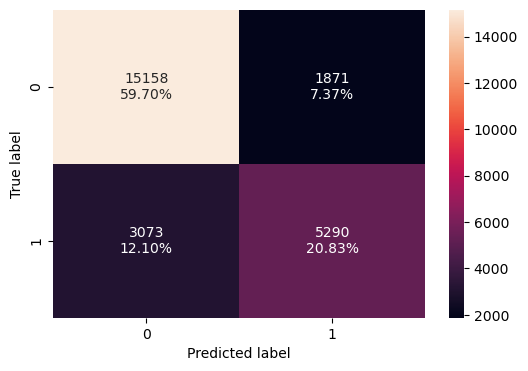

In [92]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [93]:
## Check performance to X_train1 and y_train
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80529,0.63255,0.73872,0.68153


### Let's look at ROC-AUC on Training set

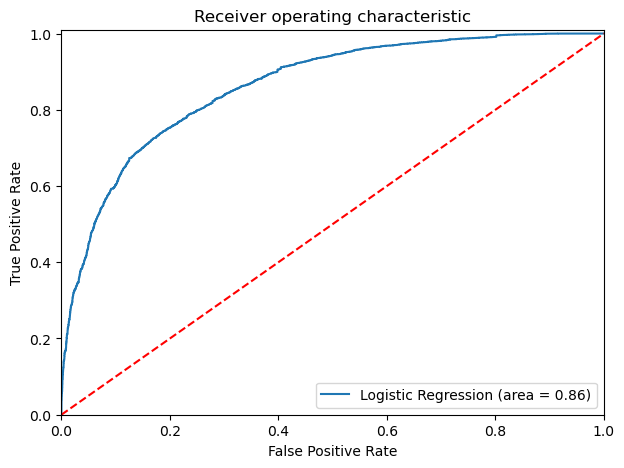

In [94]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Model Performance improvement 
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC curve.

#### Optimal threshold using AUC-ROC curve

In [95]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36059930727333694


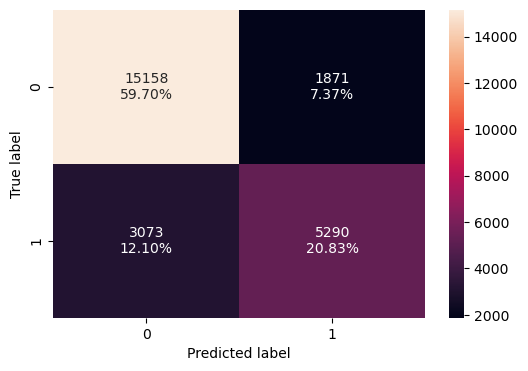

In [96]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [97]:
# Checking the model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training Model  performance:")
log_reg_model_train_perf_threshold_auc_roc

Training Model  performance:


,Accuracy,Recall,Precision,F1
0,0.78989,0.74327,0.66100,0.69972


#### Let's see Precision-Recall curve to see if we can find a better threshold

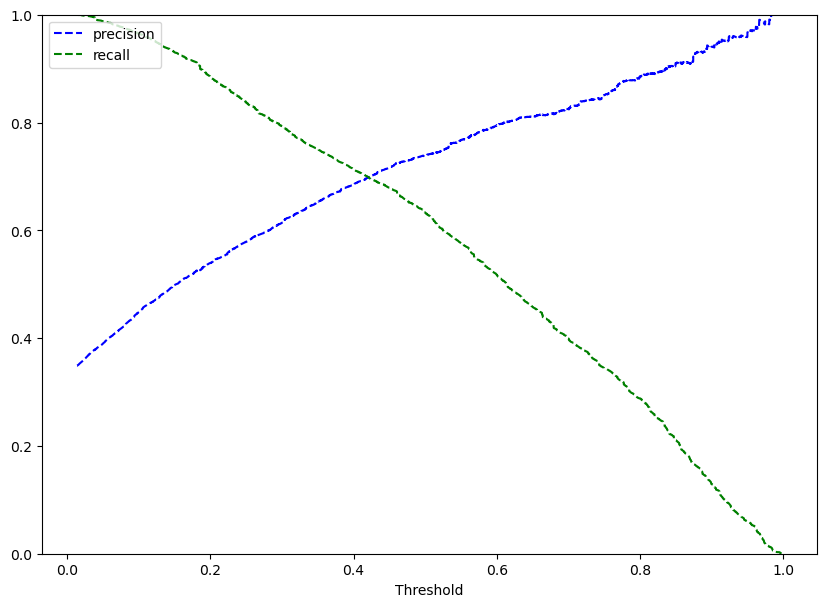

In [98]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [99]:
#setting up the threshold
optimal_threshold_curve = 0.42

#### At the threshold of 0.42 we can get balanced recall and precision

#### Checking model performance on training set
#### Now,let's set the threshold to 0.42 and find out the model performance 

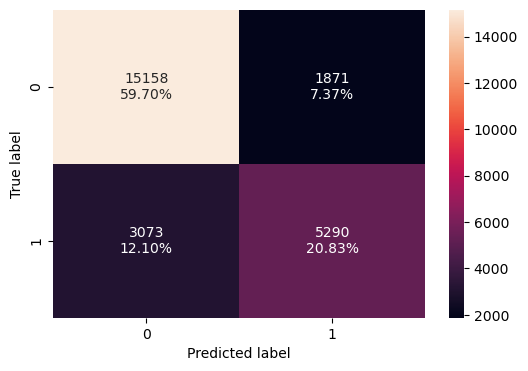

In [100]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [101]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80108,0.69903,0.69761,0.69832


#### Recall has reduced to 0.70 and Precision increased to 0.69 but the F1 metrics is still the same
#### Model is still good 

#### Let's check the model on test data
Using model with default threshold 

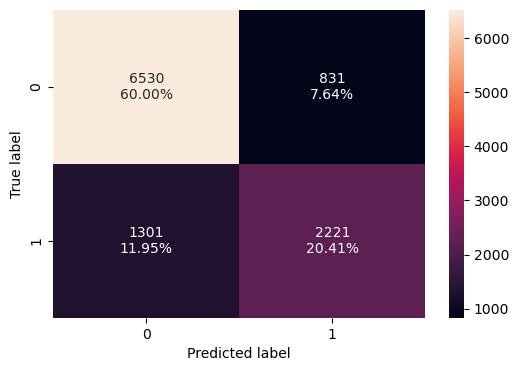

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## confusion matrix for X_test1 and y_test

In [103]:
## performance on X_test1 and y_test
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test)

print("Model Test performance:")
log_reg_model_test_perf

Model Test performance:


,Accuracy,Recall,Precision,F1
0,0.80410,0.63061,0.72772,0.67569


* F1-score-0.67
* Accuracy - 0.80
* Recall - 0.63
* Precision - 0.72
* Model is working well on the test data

#### ROC curve on the test data

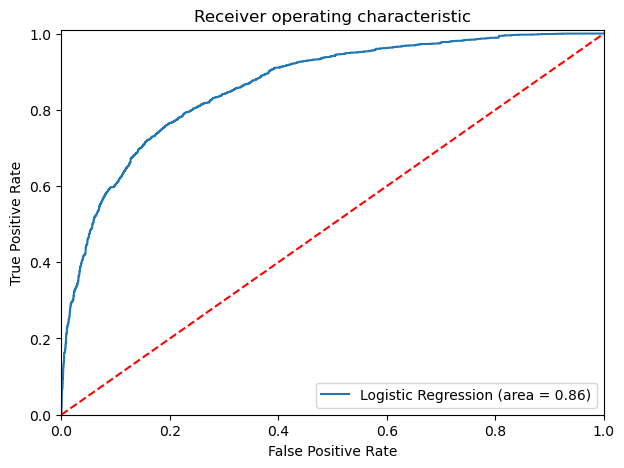

In [104]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using the Optimal threshold = 0.37 on the model with test data

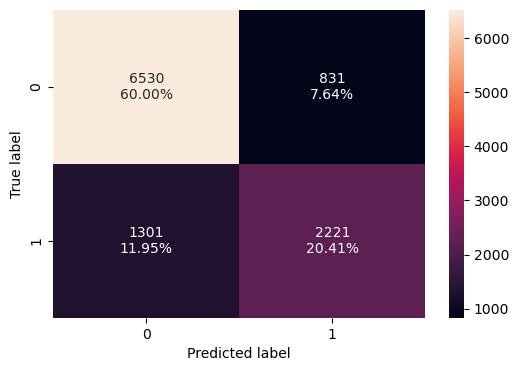

In [105]:
#plotting confusion matrix for optimal threshold 0.37
confusion_matrix_statsmodels(lg1,X_test1,y_test) 

In [106]:
#checking the model performance
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc


Test performance:


,Accuracy,Recall,Precision,F1
0,0.79371,0.74730,0.66015,0.70103


#### Using the threshold = 0.42 on the model with test data

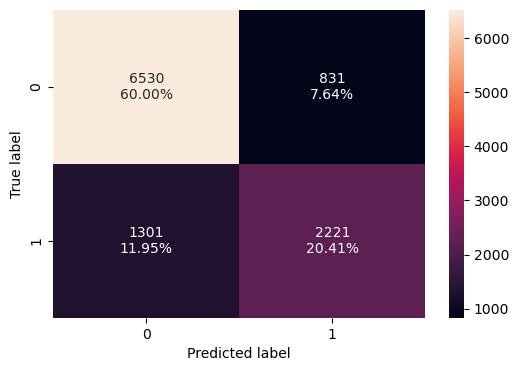

In [107]:
#creating the confusion matrix 
confusion_matrix_statsmodels(lg1, X_test1, y_test) 

In [108]:
#checking the model performance
log_reg_model_test_perf_threshold = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=0.42)
print("Test performance:")
log_reg_model_test_perf_threshold


Test performance:


,Accuracy,Recall,Precision,F1
0,0.80355,0.70329,0.69384,0.69853


## Building a Logistic Regression model
#### Model performance evaluation

In [109]:
#training model performance comparison
models_train_comp_df = pd.concat([log_reg_model_train_perf.T,log_reg_model_train_perf_threshold_auc_roc.T,log_reg_model_train_perf_threshold_curve.T],
    axis=1)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80529,0.78989,0.80108
Recall,0.63255,0.74327,0.69903
Precision,0.73872,0.66100,0.69761
F1,0.68153,0.69972,0.69832


In [110]:
# test performance comparison
models_test_comp_df = pd.concat(
 [
 log_reg_model_test_perf.T,
 log_reg_model_test_perf_threshold_auc_roc.T,
 log_reg_model_test_perf_threshold.T,
 ],
 axis=1,
)
models_test_comp_df.columns = [
 "Logistic Regression-default Threshold (0.5)",
"Logistic Regression-0.37 Threshold",
"Logistic Regression-0.42 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80410,0.79371,0.80355
Recall,0.63061,0.74730,0.70329
Precision,0.72772,0.66015,0.69384
F1,0.67569,0.70103,0.69853


## Final Model SUmmary 
* All three models are performing well on both the training and test data without overfitting
* Model with threshold value of 0.37 is giving best F1-score

## Building a Decision Tree model

### Data Preparation for modelling( Decision Tree)
* We want to predict which bookings will be canceled
* We need to encode categorical features
* We will split the data into train and test to be able to evaluate the model

In [111]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) ## create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 

In [112]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


### Function to calculcate performance metrics and confusion matrix

In [113]:
#function to check the performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [114]:
#Function to plot confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree

In [115]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train) ## fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Check the model on training set

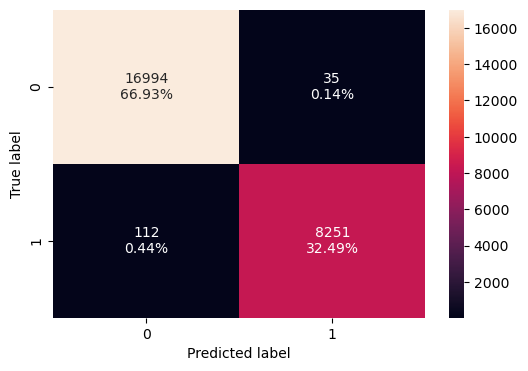

In [116]:
confusion_matrix_sklearn(model, X_train, y_train)

In [117]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


#### Check the model on testing set

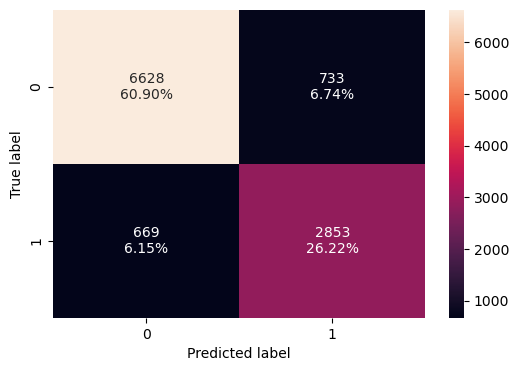

In [118]:
confusion_matrix_sklearn(model, X_test, y_test)

In [119]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81005,0.79559,0.80276


In [120]:
print(decision_tree_perf_train);
print(decision_tree_perf_test);

   Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117
   Accuracy  Recall  Precision      F1
0   0.87118 0.81005    0.79559 0.80276


* As shown in the comparison there is high discrepancy between the test and training data in terms of Accuracy, Recall,Precision and F1-Score
* This means model is overfitting

### Let's prune the tree
* Before pruning the tree lets check important features 

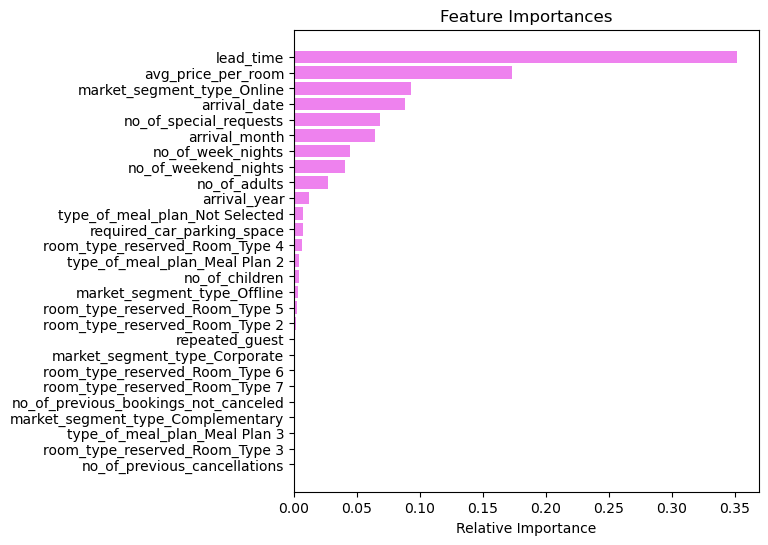

In [121]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pre-Pruning

* Using the Gridsearch hyperparameter to pre prune the tree

In [122]:
# Choosing the classifier 
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### After Pre-pruning let's see the performance of the training set

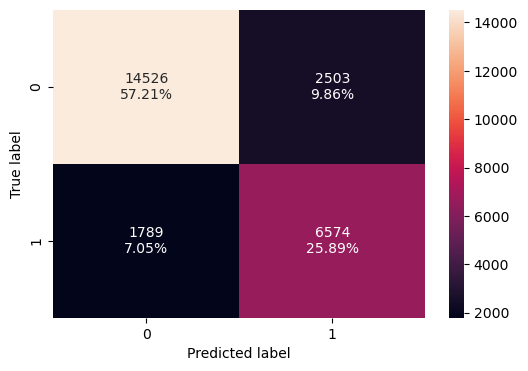

In [123]:
confusion_matrix_sklearn(estimator, X_train, y_train) 

In [124]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


### After Pre-pruning let's see the performance of the testing set

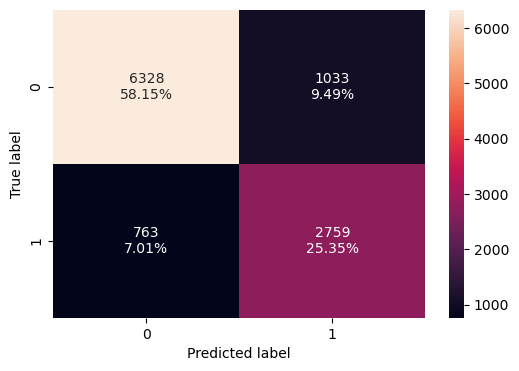

In [125]:
confusion_matrix_sklearn(estimator, X_test, y_test) 

In [126]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


### As we can see after pre-pruning 
* The parameters between train and test data have comparable values

#### Visualizing the Decision Tree

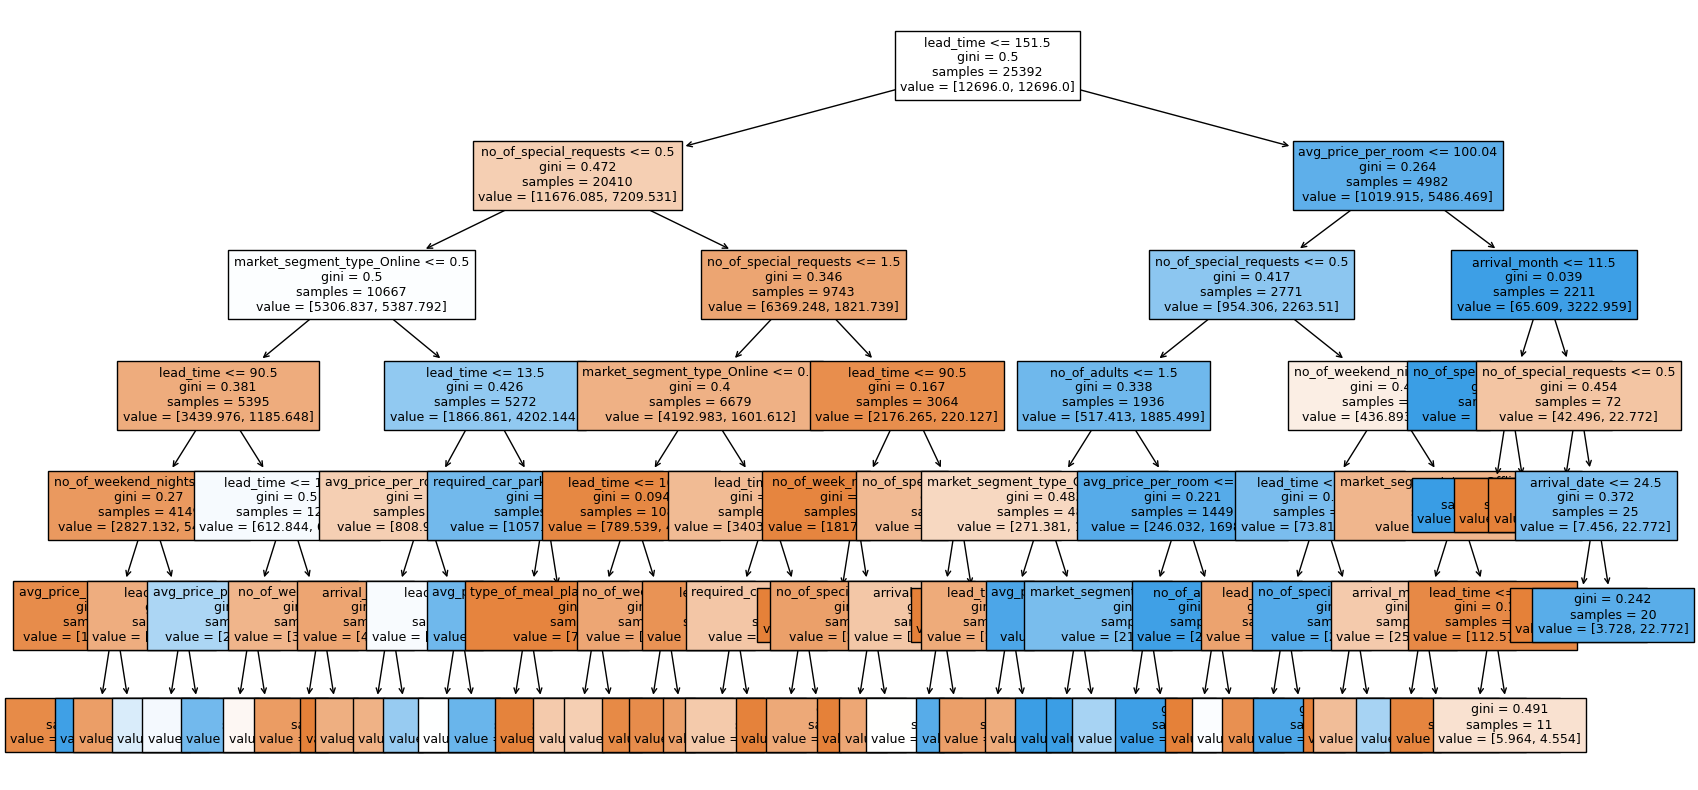

In [127]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
#Printing the text report of decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

#### Decision Tree output understanding
* If the `leadtime is`<=151.5,`no_of_special_requests`<= 0.5,`no_of_weekights`<=0.5,`avg_room_price` >= 196.50, `market_segment_online`<=0.5,then the booking is likely to get cancelled

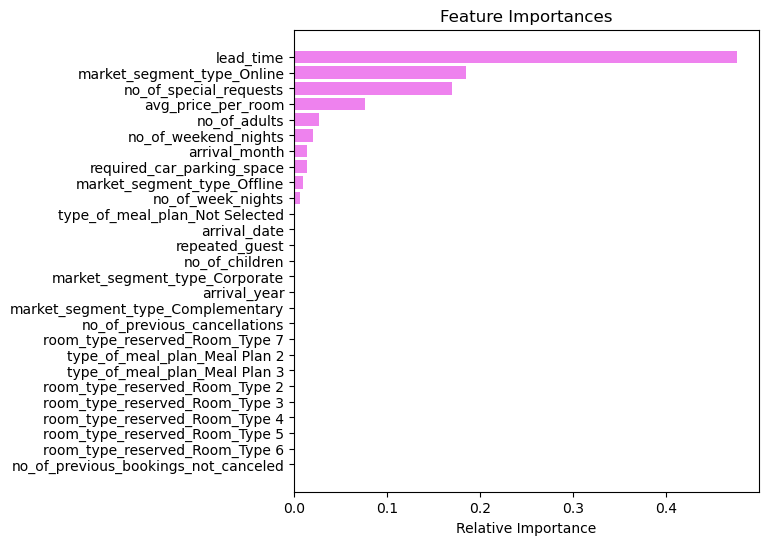

In [129]:
#lets see the important features after Pre-pruning
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* After Pre-Pruning, `lead_time lead time`,`market_segment_online`,`special requests`,`average_room_price` are the top important features 

#### Cost Complexity Pruning
* Cost Complexity Pruning is a post pruning method to control tree size
* we will use `DecisionTreeClassifier`

In [130]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [131]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1837,0.00890,0.32806
1838,0.00980,0.33786
1839,0.01272,0.35058
1840,0.03412,0.41882


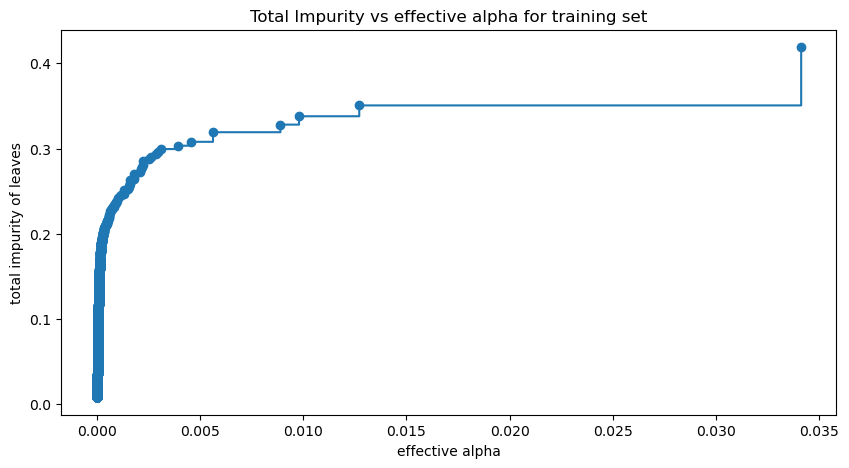

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [133]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136932


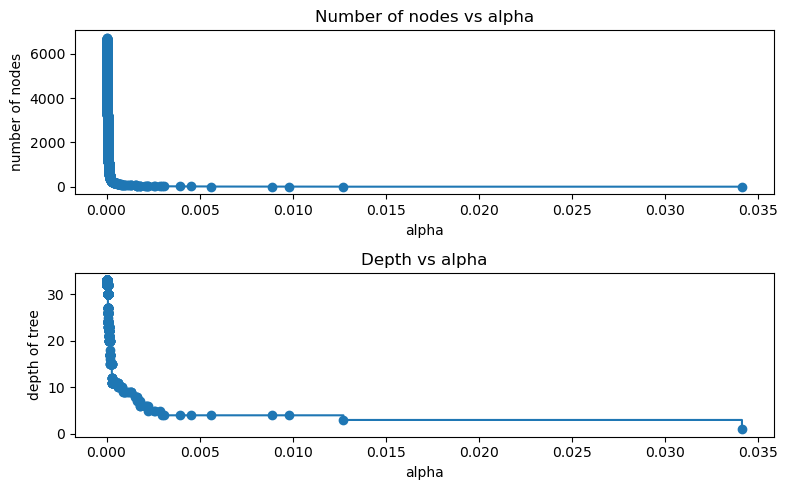

In [134]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs Alpha for training sets

In [135]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

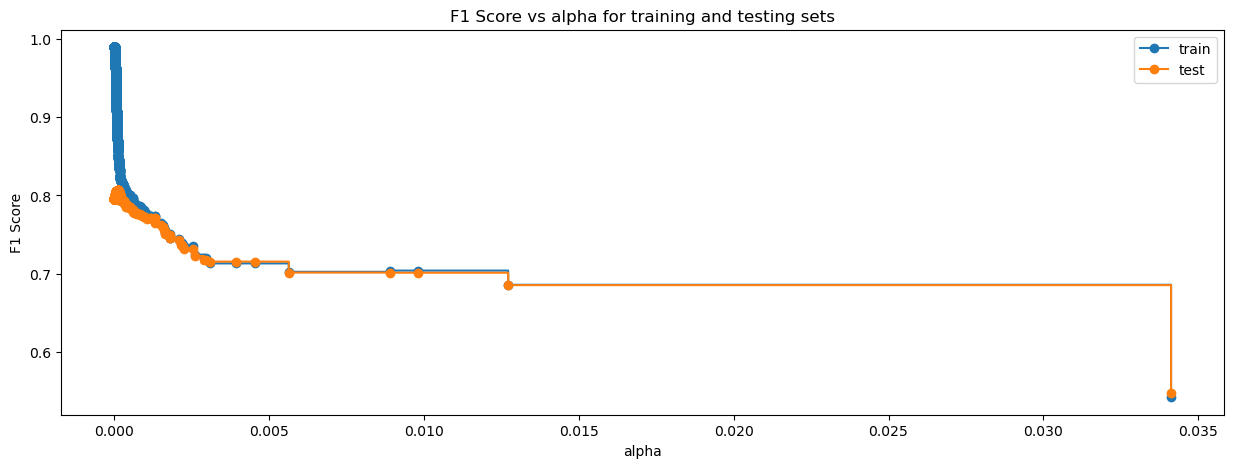

In [136]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [137]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012291224171537176,
                       class_weight='balanced', random_state=1)


#### Checking model on training set

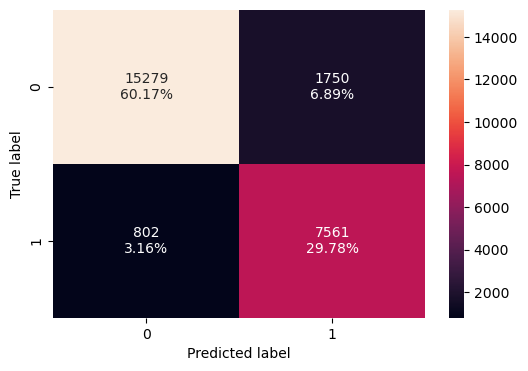

In [138]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [139]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89950,0.90410,0.81205,0.85561


#### Checking model on test data set

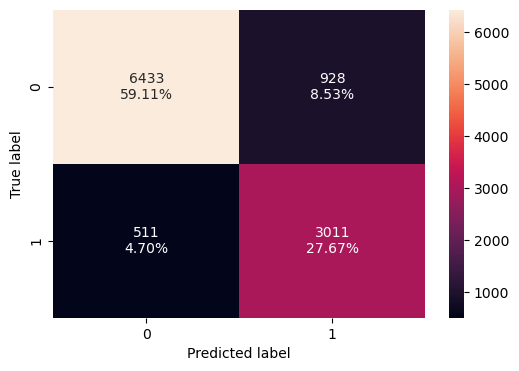

In [140]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [141]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86778,0.85491,0.76441,0.80713


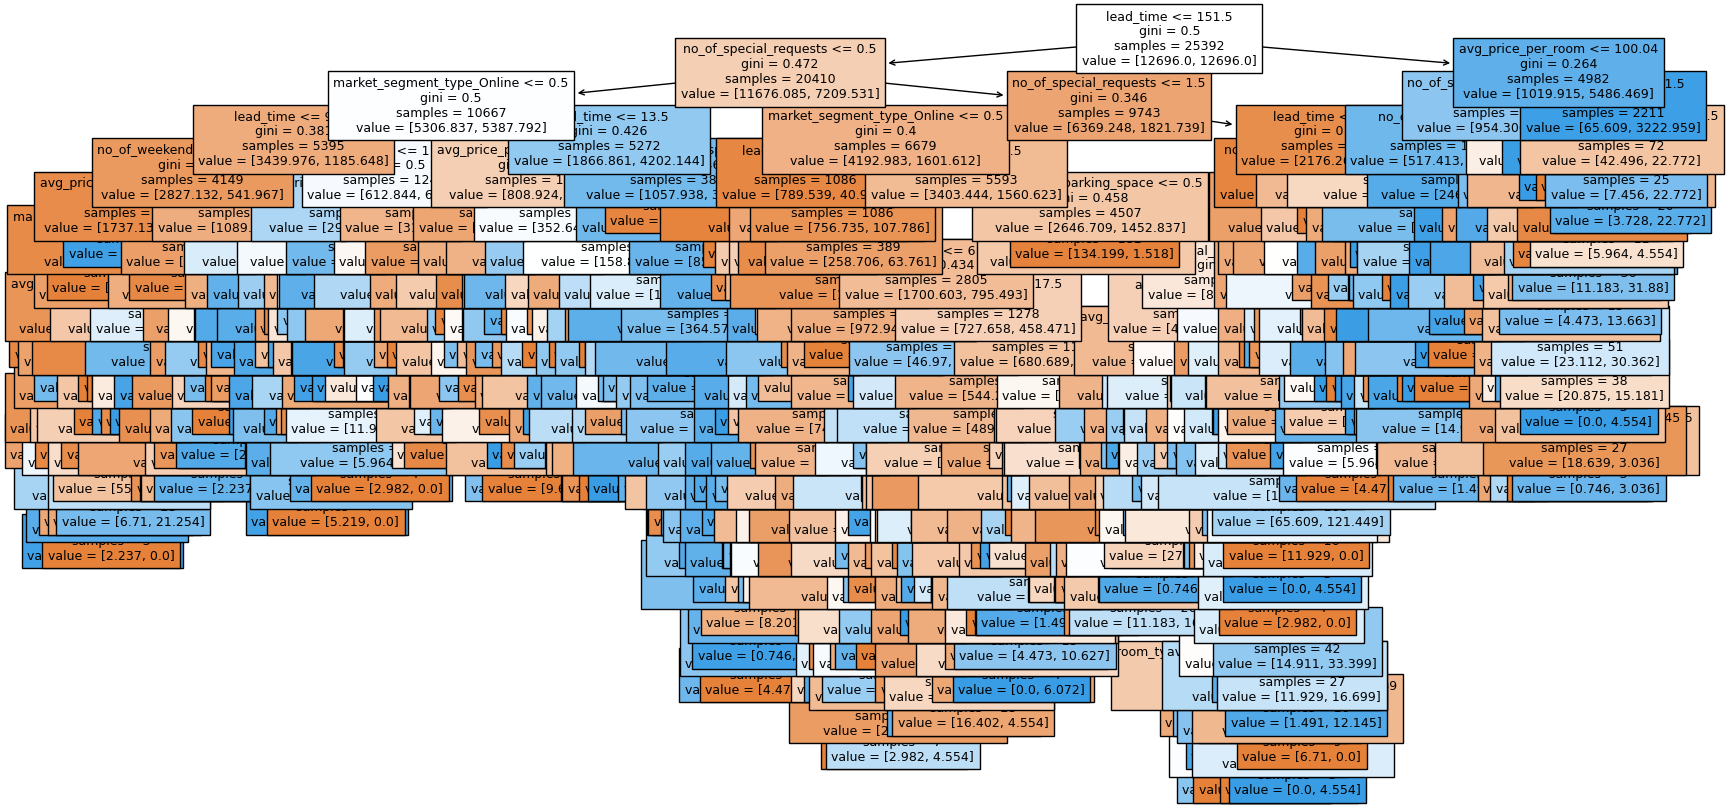

In [142]:
#Let's plot the tree plot
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [143]:
#Let's see the decision tree report
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

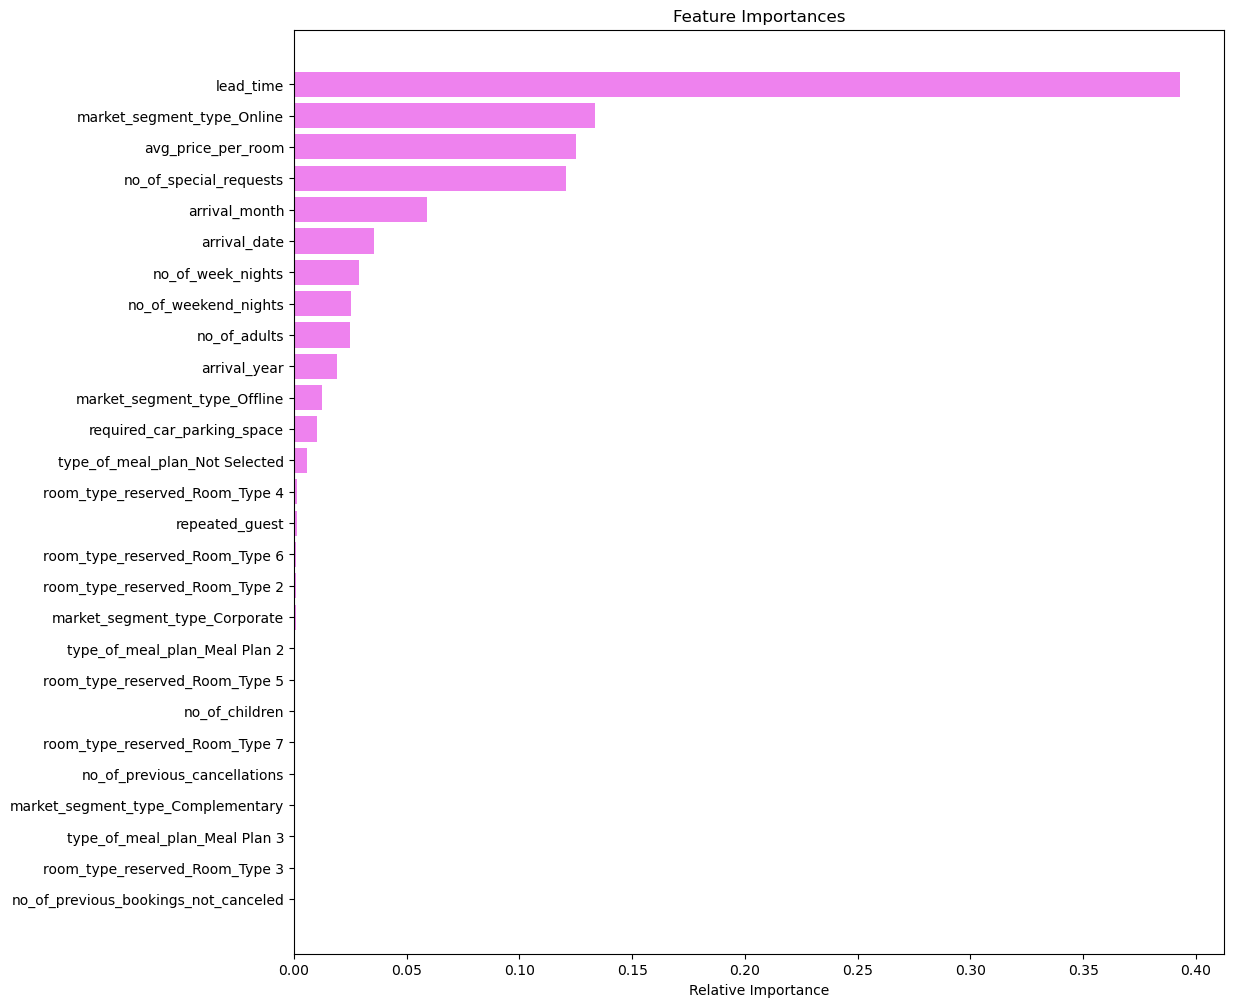

In [144]:
#Let's plot important features 
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `lead_time` and `market_segment_type_online` are still top features in the pruned tree

## Model Performance Comparison and Conclusions

### Model performance comparison on the training data

In [145]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training Model performance comparison:")
models_train_comp_df

Training Model performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89950
Recall,0.98661,0.78608,0.90410
Precision,0.99578,0.72425,0.81205
F1,0.99117,0.75390,0.85561


### Model performance comparison on the testing data

In [146]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing Model performance comparison:")
models_test_comp_df

Testing Model performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86778
Recall,0.81005,0.78336,0.85491
Precision,0.79559,0.72758,0.76441
F1,0.80276,0.75444,0.80713


* The parameters Accuracy,Recall,Precision and F1-score have better values in the post pruned tree than Pre-pruned tree

## Conclusion

* Usually atleast 2 person are inculded in the booking 
* People try to book the rooms for an average of 2 nights during weekdays and 1 night during weekends
* Usually booking are done around 3 months (85 days) in advance
* From the graph it is visible that room type 1 is more preferred
* Average room price is 104 Euros
* Customers making the reservations mostly first timers as number of previous cancellations is very low
* Majority guests book the room online

## Actionable Insights and Recommendations

### What profitable policies for cancellations and refunds can the hotel adopt?
* Lead time, market segment, average room price, number of special requests are the top 4 most important variables. Increasing these parameters increase the probability of the cancellations
* Hotel must display the booking cancellation at the time of booking clearly, because the online booking segment is the highest while making reservations 
* When making a reservation the hotel should make the customer aware of all the special requests, as seen from the graph the more special requests are made the cancellations are reduced
* There should some promotions (like free breakfast and Meal) and discounts during low booking months like Jan,Feb and March to lure the customers
* Also to increase the bookings during the weekend Hotel should implement the same strategy as mentioned above
* As we can observe from the graph, the higher average room price the probability of cancellations is more, Hotel should be flexible for the prices

### What other recommedations would you suggest to the hotel?
* There should be more data available for more years rather than only 2017 and 2018, that will prove helpful in predicting cancellations
* Almost no repeated guest has cancelled the booking, so the INN Hotels should have a loyalty program to attract more regular customers
* The Cancellations/Refund policies should be more flexible to attract more customers